# Important necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

### reading files

In [2]:
df_train_y = pd.read_csv('input/training_set_labels.csv')
df_train_X = pd.read_csv('input/trainin_set_values.csv')
df_sub_format = pd.read_csv('input/SubmissionFormat.csv')
df_test_X = pd.read_csv('input/test_set_values.csv')

In [3]:
df_train_X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df_train_y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


**merging the both test and train**

In [5]:
df_train = df_train_X.merge(df_train_y, on='id', how='inner')

# EDA and Data Pre-Processing


data pre-processing (identifying base features)
------------
below will be listed and organized after analysis

- all numeric features 
- all text features 
- all date features 
- all geo features 
- all categorical features 
- all continuous features 
- all useless features


In [6]:
# created two lists which we will be populating alongside our analysis 

global_cols_to_del = [] # for columns to be deleted
global_new_feat = [] # for new features
global_base_features = [] # for base feature set
global_mean_feat = [] # for mean encoded feature set
le = LabelEncoder()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
df_train.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

seems like there can be lots of categorical featues...

**listing down the features that might be categorical but display as object**

In [8]:
# listing down categorical features which may have at max 27 categories
counter = 0 
categorical_var = []
for i,j in enumerate(df_train.columns):
    nunui = df_train[j].nunique()
    if (nunui <= 27): 
        counter+=1
        categorical_var.append(j)
        
df_train[categorical_var].nunique()        

basin                     9
region                   21
region_code              27
district_code            20
public_meeting            2
recorded_by               1
scheme_management        12
permit                    2
extraction_type          18
extraction_type_group    13
extraction_type_class     7
management               12
management_group          5
payment                   7
payment_type              7
water_quality             8
quality_group             6
quantity                  5
quantity_group            5
source                   10
source_type               7
source_class              3
waterpoint_type           7
waterpoint_type_group     6
status_group              3
dtype: int64

In [9]:
df_train[categorical_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   basin                  59400 non-null  object
 1   region                 59400 non-null  object
 2   region_code            59400 non-null  int64 
 3   district_code          59400 non-null  int64 
 4   public_meeting         56066 non-null  object
 5   recorded_by            59400 non-null  object
 6   scheme_management      55523 non-null  object
 7   permit                 56344 non-null  object
 8   extraction_type        59400 non-null  object
 9   extraction_type_group  59400 non-null  object
 10  extraction_type_class  59400 non-null  object
 11  management             59400 non-null  object
 12  management_group       59400 non-null  object
 13  payment                59400 non-null  object
 14  payment_type           59400 non-null  object
 15  water_quality      

# analyzing categorical features


so we've got some individual features, and some set of features. 

- basin, region, public_meeting, recorded_by, scheme_management, permit
- extraction_type, extraction_type_group, extract_type_class
- management, management_group
- payment, payment_type
- water_quality, quality_group
- quantity, quantity_group
- source, source_type, source_class
- waterpoint_type, waterpoint_type_group


region, region_code
--

In [10]:
df_train[['region','region_code']].drop_duplicates().sort_values(by='region').reset_index(drop=True)

,region,region_code
0,Arusha,24
1,Arusha,2
2,Dar es Salaam,7
3,Dodoma,1
4,Iringa,11
5,Kagera,18
6,Kigoma,16
7,Kilimanjaro,3
8,Lindi,8
9,Lindi,80


seems like 
- region_code isn't basically region code or 
- region has multiple region_codes (thats more like it.)

the region, region_code & district code are the values we will have to keenly look at.
we can't just call them categorical, because they aren't fixed, and unseen data may have some values that aren't available for the model
such as some new region_code.
we can see that region **Tanga** has two region code, as well as **Mtwara**, and **Mwanza** etc. 

in order to cross verify, and to decide on our strategy, let's cross check between test and train data for these features

In [11]:
print('region_code .. train ',df_train.region_code.nunique(), ' test',df_test_X.region_code.nunique())
print('region .. train ',df_train.region.nunique(), ' test',df_test_X.region.nunique())
print('district_code .. train ',df_train.district_code.nunique(), ' test',df_test_X.district_code.nunique())

region_code .. train  27  test 26
region .. train  21  test 21
district_code .. train  20  test 20


In [12]:
df_train[df_train.region_code.isin(df_test_X.region_code)==False].region_code

31798    40
Name: region_code, dtype: int64

the region code 40 isn't available in test set.

we will keep the region_code, and district_code, and region as categorical variable

region will be converted through label encoding at a later stage. 

also, we may also try some advanced features like target based mean encoding 

on the other hand, **recorded_by** is a useless features as it contains only one value

In [13]:
global_cols_to_del.append('recorded_by')
global_base_features.append('district_code')

In [14]:
categorical_var.remove('status_group')

In [15]:
df_train[categorical_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   basin                  59400 non-null  object
 1   region                 59400 non-null  object
 2   region_code            59400 non-null  int64 
 3   district_code          59400 non-null  int64 
 4   public_meeting         56066 non-null  object
 5   recorded_by            59400 non-null  object
 6   scheme_management      55523 non-null  object
 7   permit                 56344 non-null  object
 8   extraction_type        59400 non-null  object
 9   extraction_type_group  59400 non-null  object
 10  extraction_type_class  59400 non-null  object
 11  management             59400 non-null  object
 12  management_group       59400 non-null  object
 13  payment                59400 non-null  object
 14  payment_type           59400 non-null  object
 15  water_quality      

**converting them to categorical**

In [16]:
for feat in categorical_var:
    df_train[feat] = df_train[feat].astype('category')
    
df_train[categorical_var].info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   basin                  59400 non-null  category
 1   region                 59400 non-null  category
 2   region_code            59400 non-null  category
 3   district_code          59400 non-null  category
 4   public_meeting         56066 non-null  category
 5   recorded_by            59400 non-null  category
 6   scheme_management      55523 non-null  category
 7   permit                 56344 non-null  category
 8   extraction_type        59400 non-null  category
 9   extraction_type_group  59400 non-null  category
 10  extraction_type_class  59400 non-null  category
 11  management             59400 non-null  category
 12  management_group       59400 non-null  category
 13  payment                59400 non-null  category
 14  payment_type           59400 non-null 

basin 
---

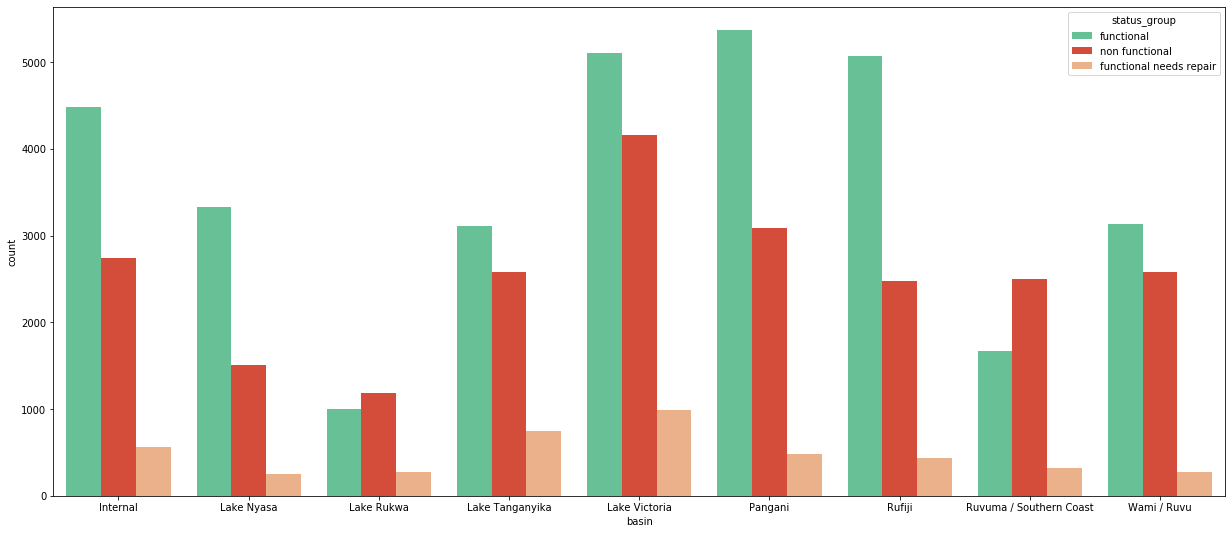

In [17]:
fig, ax = plt.subplots(figsize=(21,9))
sns.countplot(x='basin', hue='status_group', data=df_train, ax=ax,palette=['#59cf98','#ed3821','#FAAE7B'])

basin shows the statistics about how many status_group each one has. it is an important feature to be kept.  

In [18]:
global_base_features.append('basin')

In [19]:
df_train.region_code.nunique(), df_train.region.nunique()

(27, 21)

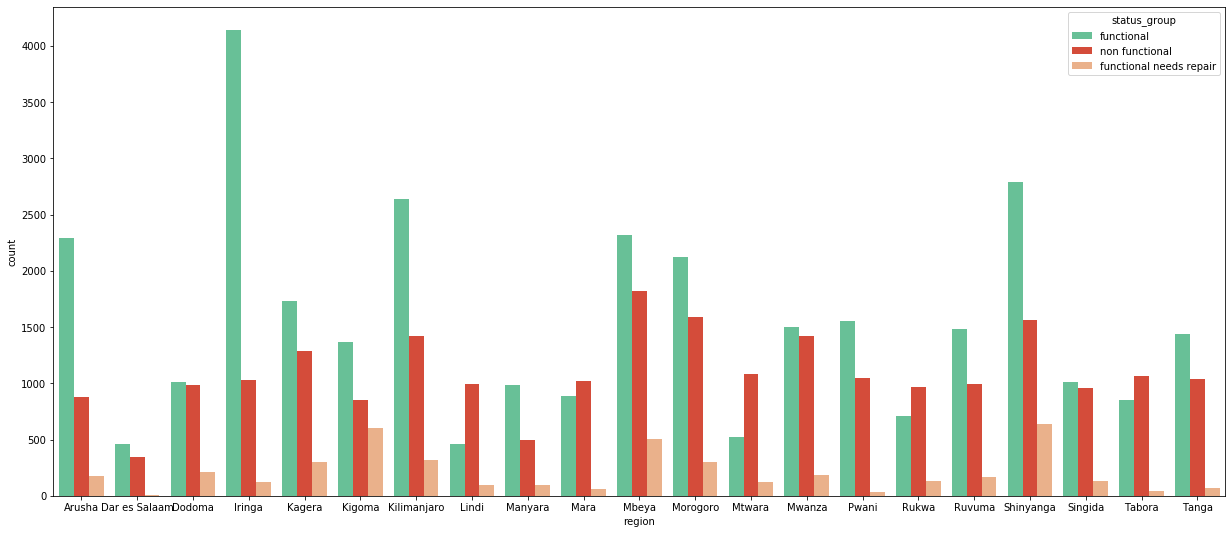

In [20]:
fig, ax = plt.subplots(figsize=(21,9))
sns.countplot(x='region', hue='status_group', data=df_train, ax=ax,palette=['#59cf98','#ed3821','#FAAE7B'])

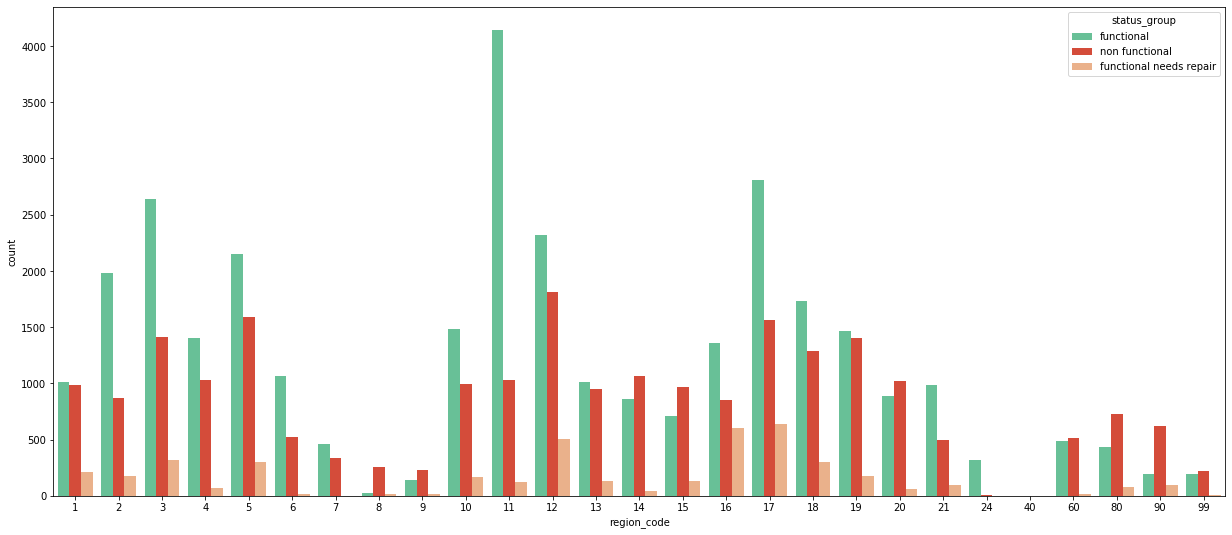

In [21]:
fig, ax = plt.subplots(figsize=(21,9))
sns.countplot(x='region_code', hue='status_group', data=df_train, ax=ax,palette=['#59cf98','#ed3821','#FAAE7B'])

my analysis is that if region_code is capturing more information at a lower level, we should keep the region_code, rather than the region. 
we will keep both of them in the base feature set, and keep the region to be deleted for later

In [22]:
df_train[['region','region_code']].drop_duplicates().sort_values(by='region')

,region,region_code
209,Arusha,24
35,Arusha,2
145,Dar es Salaam,7
30,Dodoma,1
0,Iringa,11
4,Kagera,18
24,Kigoma,16
13,Kilimanjaro,3
626,Lindi,8
26,Lindi,80


In [23]:
global_cols_to_del.append('region')
global_base_features.append('region')
global_base_features.append('region_code')

In [215]:
global_mean_feat.append('region')

In [24]:
df_train['public_meeting'].nunique(),df_train['public_meeting'].unique()

(2,
 [True, NaN, False]
 Categories (2, object): [True, False])

In [25]:
df_train[df_train['public_meeting']==True]['status_group'].value_counts()

functional                 28408
non functional             18884
functional needs repair     3719
Name: status_group, dtype: int64

In [26]:
df_train[df_train['public_meeting']==False]['status_group'].value_counts()

non functional             2440
functional                 2173
functional needs repair     442
Name: status_group, dtype: int64

In [27]:
df_train['public_meeting'].value_counts()/len(df_train)

True     0.858771
False    0.085101
Name: public_meeting, dtype: float64

In [28]:
df_train['public_meeting'].isnull().sum()

3334

since we don't know the true value of public meeting wherever it is null, and it will not be worth at the moment to invest time on it 

we will replace the nulls by -1, to create it as a third category.

In [29]:
# let's convert the public meeting
df_train['public_meeting_label'] = le.fit_transform(df_train['public_meeting'])

In [30]:
df_train['public_meeting_label'].value_counts()

1    51011
0     5055
2     3334
Name: public_meeting_label, dtype: int64

In [31]:
global_base_features.append('public_meeting_label')
global_cols_to_del.append('public_meeting')

global_base_features,global_cols_to_del

(['district_code', 'basin', 'region', 'region_code', 'public_meeting_label'],
 ['recorded_by', 'region', 'public_meeting'])

scheme_management, permit
--

In [32]:
df_train['scheme_management'].isnull().sum()

3877

In [33]:
df_train['scheme_management'].value_counts().sum(), len(df_train) 

(55523, 59400)

there are null values in the scheme management, for which we will have to convert it to label encoding.

In [34]:
df_train['scheme_management_label'] = le.fit_transform(df_train['scheme_management'])
df_train['scheme_management_label'].value_counts().sum()

59400

In [35]:
df_train[['scheme_management','scheme_management_label']].drop_duplicates()

,scheme_management,scheme_management_label
0,VWC,7
1,Other,2
4,NaN,12
10,Private operator,4
11,WUG,9
13,Water Board,10
16,WUA,8
23,Water authority,11
28,Company,0
84,Parastatal,3


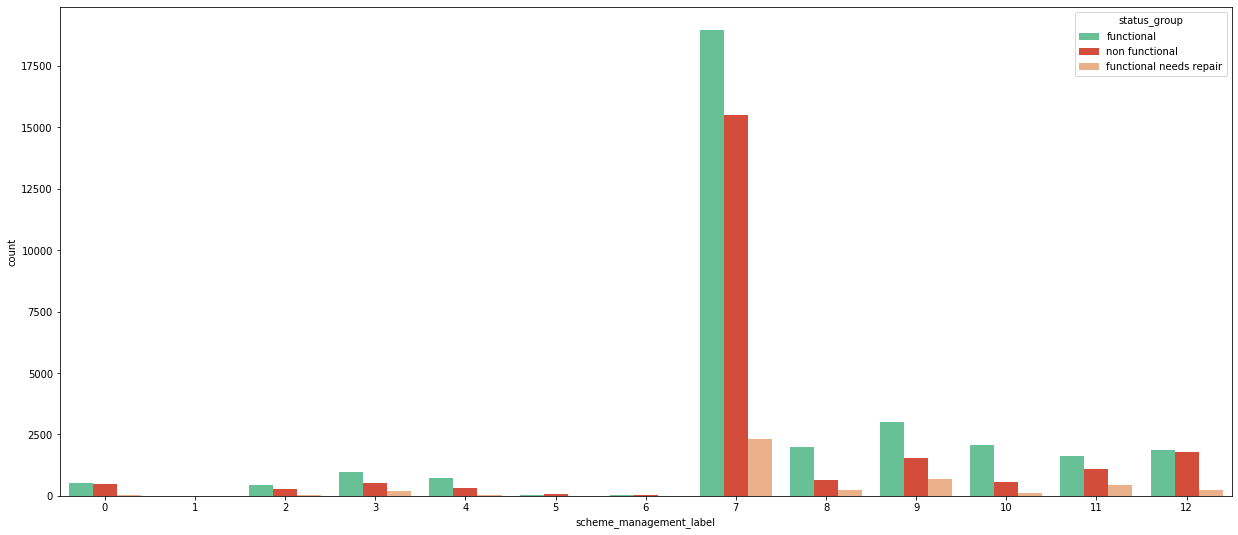

In [36]:
fig, ax = plt.subplots(figsize=(21,9))
sns.countplot(x='scheme_management_label', hue='status_group', data=df_train, ax=ax,palette=['#59cf98','#ed3821','#FAAE7B'])

In [37]:
global_base_features.append('scheme_management_label')
global_cols_to_del.append('scheme_management')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label']

In [216]:
global_mean_feat.append('scheme_management_label')

**permit**

In [38]:
df_train.permit.unique()

[False, True, NaN]
Categories (2, object): [False, True]

In [39]:
df_train.permit.value_counts().sum() - len(df_train)

-3056

so there are 3056 nulls, converting them through label_encoding will do the job for the moment. 

In [40]:
df_train['permit_label'] = le.fit_transform(df_train['permit'])

In [41]:
df_train['permit_label'].value_counts().sum()

59400

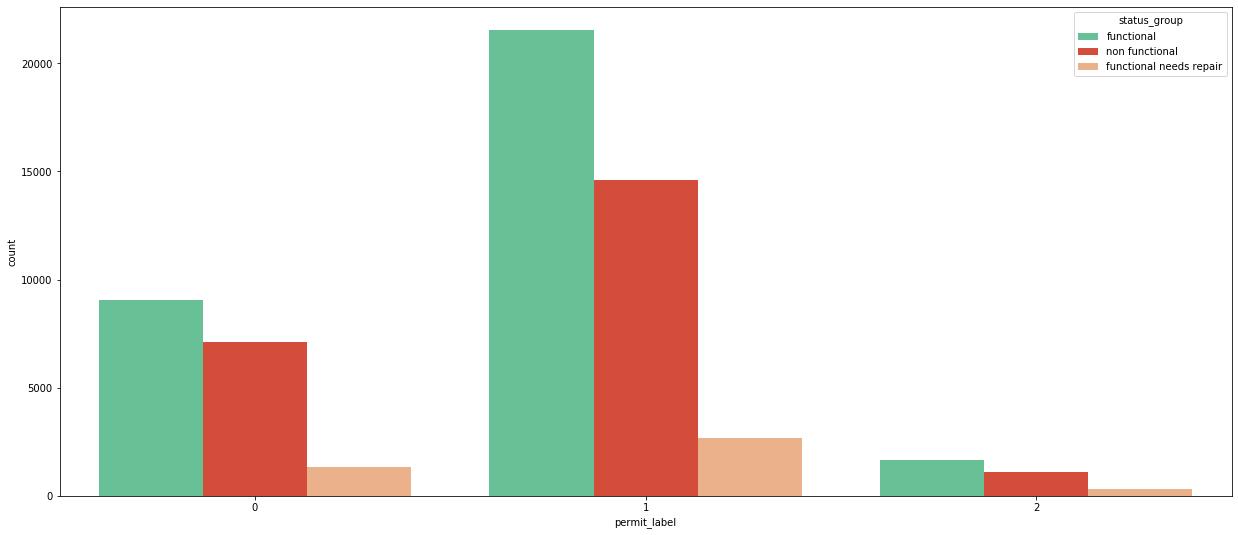

In [42]:
fig, ax = plt.subplots(figsize=(21,9))
sns.countplot(x='permit_label', hue='status_group', data=df_train, ax=ax,palette=['#59cf98','#ed3821','#FAAE7B'])

In [43]:
global_base_features.append('permit_label')
global_cols_to_del.append('permit')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label']

extraction_type, extraction_type_group, extract_type_class
--

In [44]:
df_train[[ 'extraction_type', 'extraction_type_group', 'extraction_type_class']]\
.drop_duplicates().sort_values(by='extraction_type_class').reset_index(drop=True)

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,other - play pump,other handpump,handpump
2,other - swn 81,other handpump,handpump
3,india mark iii,india mark iii,handpump
4,afridev,afridev,handpump
5,walimi,other handpump,handpump
6,other - mkulima/shinyanga,other handpump,handpump
7,india mark ii,india mark ii,handpump
8,nira/tanira,nira/tanira,handpump
9,swn 80,swn 80,handpump


In [45]:
df_train.extraction_type.isnull().sum(), df_train.extraction_type_group.isnull().sum()

(0, 0)

In [46]:
df_train.extraction_type_class.isnull().sum()

0

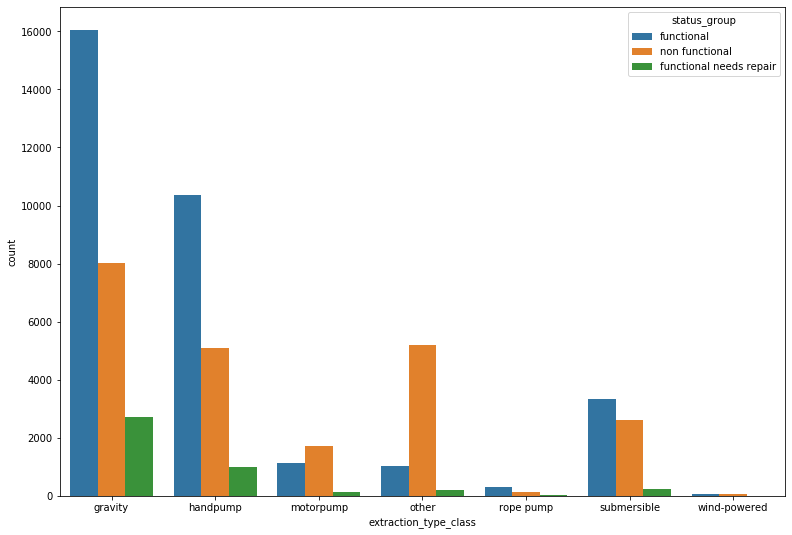

In [47]:
fig, ax = plt.subplots(figsize=(13,9))
sns.countplot(x='extraction_type_class', hue='status_group', data=df_train, ax=ax)

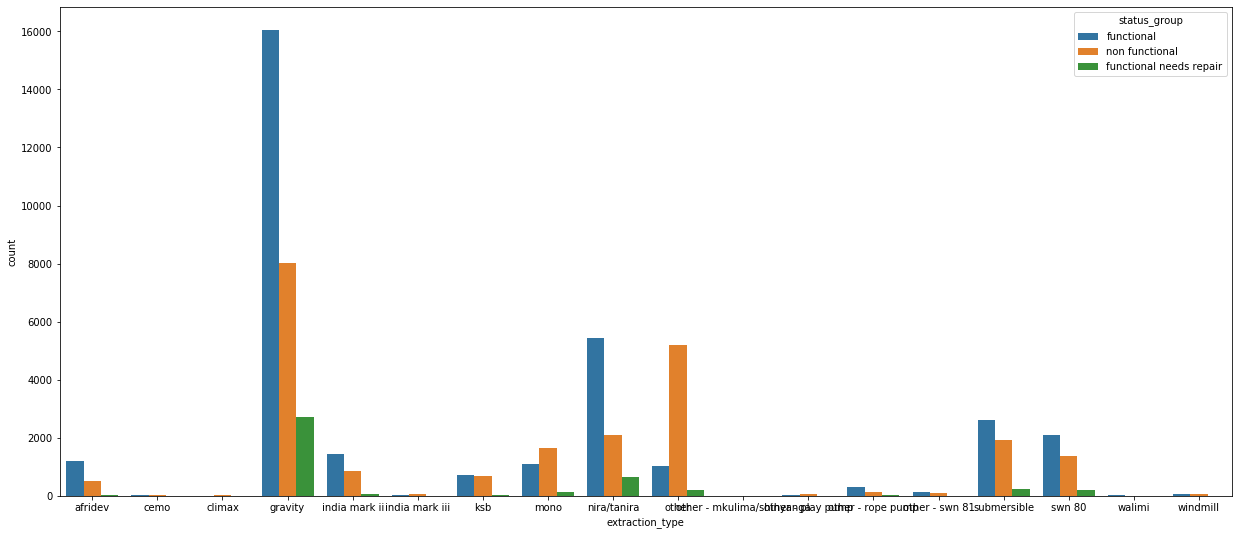

In [48]:
fig, ax = plt.subplots(figsize=(21,9))
sns.countplot(x='extraction_type', hue='status_group', data=df_train, ax=ax)

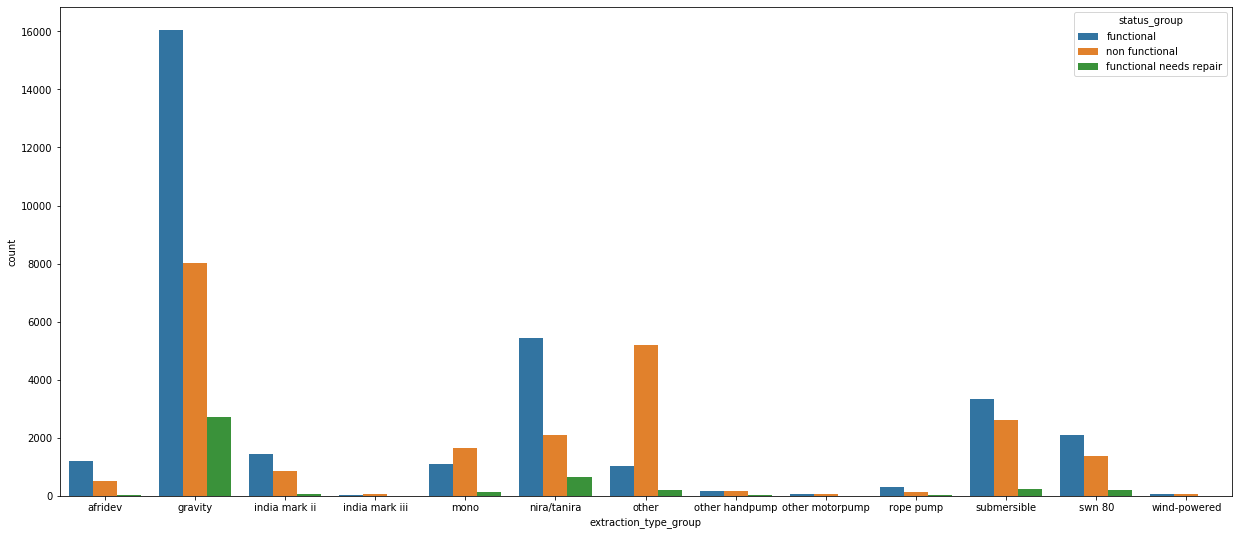

In [49]:
fig, ax = plt.subplots(figsize=(21,9))
sns.countplot(x='extraction_type_group', hue='status_group', data=df_train, ax=ax)

In [50]:
global_base_features.append('extraction_type_group')
global_base_features.append('extraction_type_class')
global_base_features.append('extraction_type')

global_cols_to_del.append('extraction_type_class')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type']

In [217]:
global_mean_feat.append('extraction_type_group')

In [51]:
global_cols_to_del

['recorded_by',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class']

management, management_group
--

In [52]:
df_train[['management', 'management_group']].drop_duplicates().sort_values('management_group')

,management,management_group
10,private operator,commercial
28,company,commercial
50,water authority,commercial
1703,trust,commercial
4,other,other
636,other - school,other
84,parastatal,parastatal
227,unknown,unknown
0,vwc,user-group
1,wug,user-group


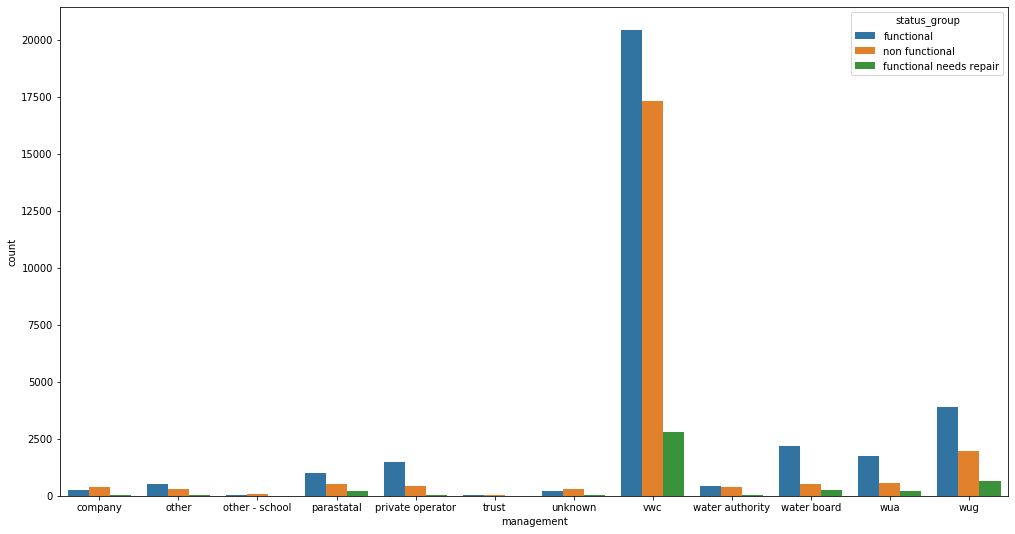

In [53]:
fig, ax = plt.subplots(figsize=(17,9))
sns.countplot(x='management', hue='status_group', data=df_train, ax=ax)

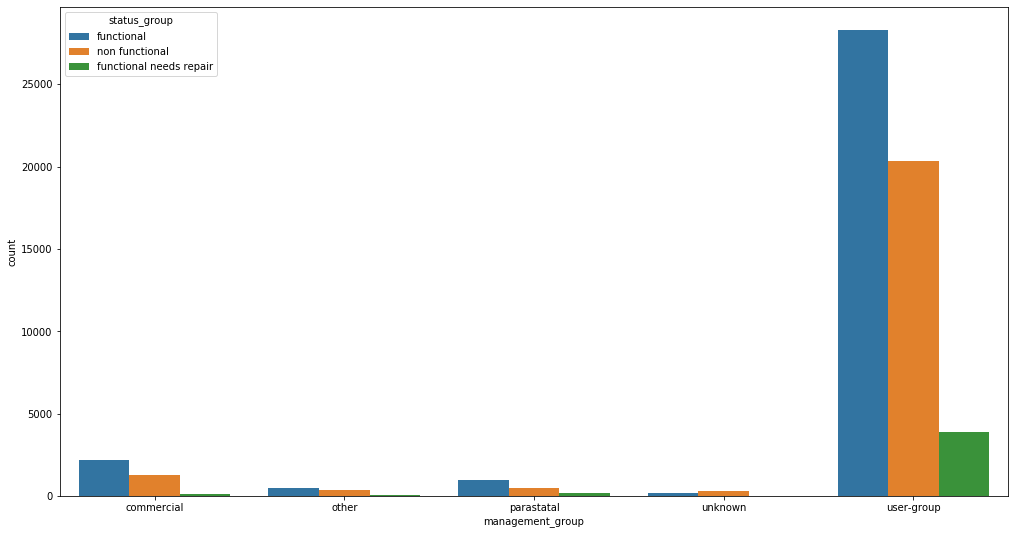

In [54]:
fig, ax = plt.subplots(figsize=(17,9))
sns.countplot(x='management_group', hue='status_group', data=df_train, ax=ax)

In [55]:
global_base_features.append('management')
global_base_features.append('management_group')
global_cols_to_del.append('management_group')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group']

In [218]:
global_mean_feat.append('management')

payment, payment_type
--

In [56]:
df_train[['payment','payment_type']].drop_duplicates()

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
7,unknown,unknown
11,pay when scheme fails,on failure
12,other,other
13,pay monthly,monthly


In [57]:
df_train['payment'].value_counts().sum(),df_train['payment_type'].value_counts().sum()

(59400, 59400)

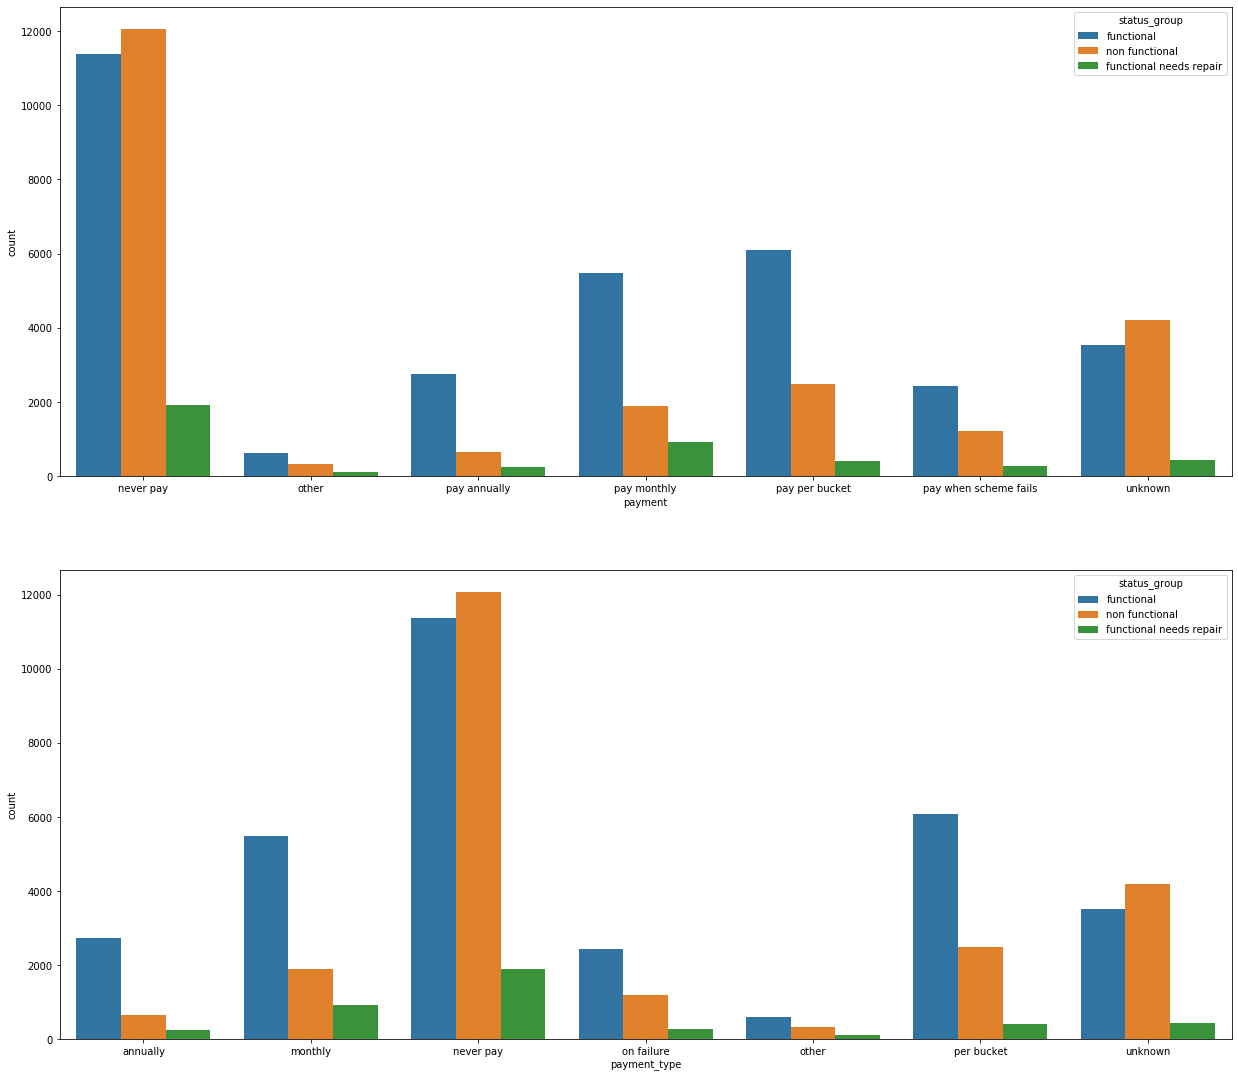

In [58]:
fig = plt.figure(figsize=(21,19))
gs = fig.add_gridspec(2, 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

sns.countplot(x='payment', hue='status_group', data=df_train, ax=ax0)
sns.countplot(x='payment_type', hue='status_group', data=df_train, ax=ax1)

identical values, so we will delete payment_type and will keep payment, while keeping both in the base features

In [59]:
global_base_features.append('payment')
global_base_features.append('payment_type')
global_cols_to_del.append('payment_type')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type']

In [219]:
global_mean_feat.append('payment')

water_quality, quality_group
--

In [60]:
df_train[[ 'water_quality', 'quality_group']].drop_duplicates().sort_values(by='quality_group')

,water_quality,quality_group
129,coloured,colored
110,fluoride,fluoride
6793,fluoride abandoned,fluoride
0,soft,good
7,milky,milky
5,salty,salty
277,salty abandoned,salty
21,unknown,unknown


In [61]:
df_train.quality_group.isnull().sum(), df_train.water_quality.isnull().sum()

(0, 0)

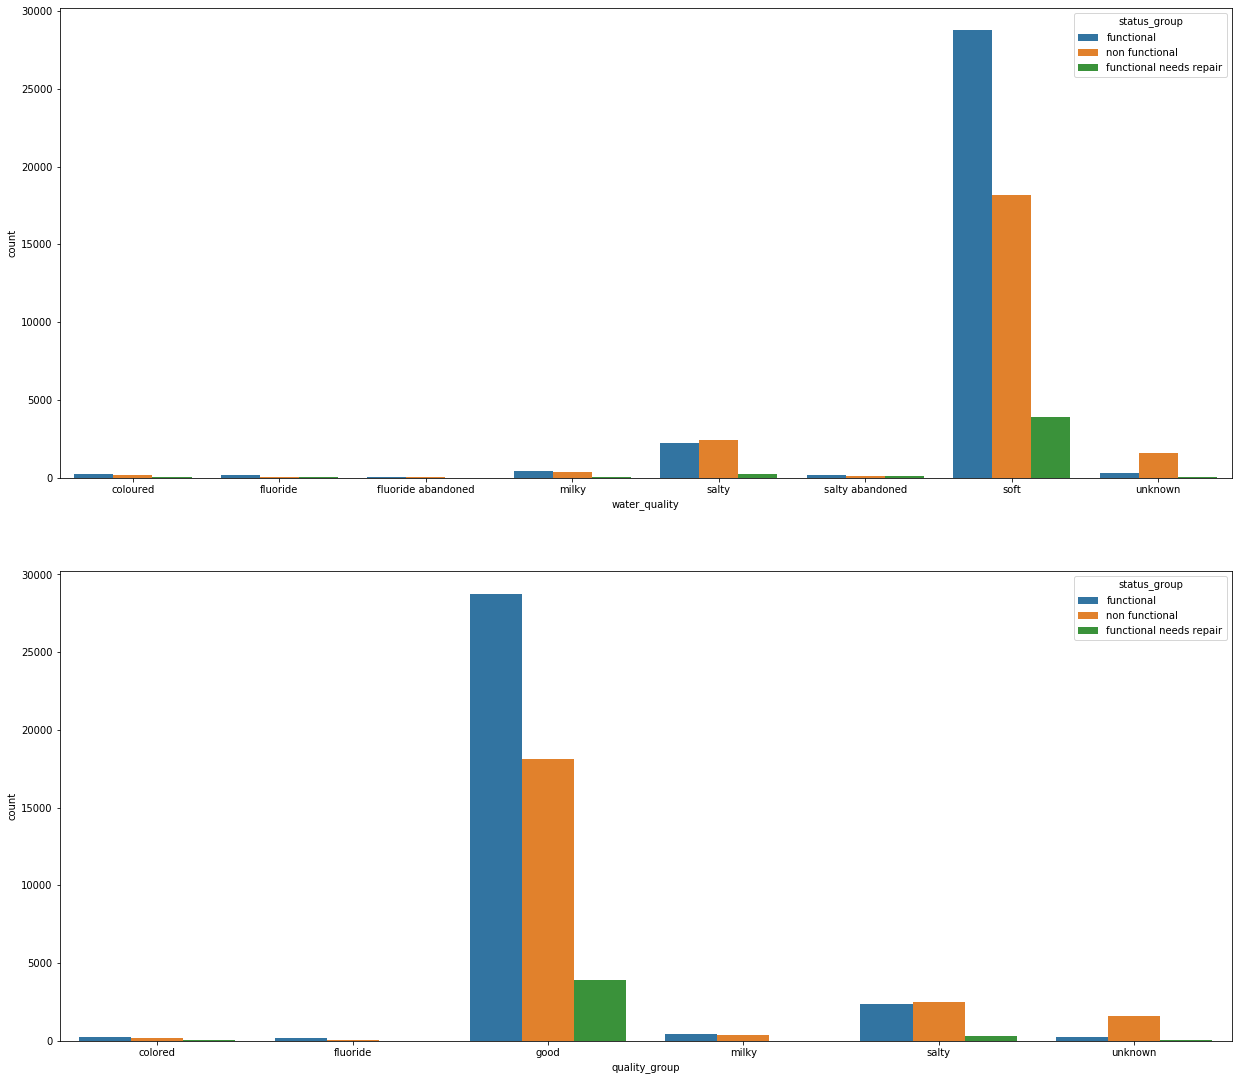

In [62]:
fig = plt.figure(figsize=(21,19))
gs = fig.add_gridspec(2, 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

sns.countplot(x='water_quality', hue='status_group', data=df_train, ax=ax0)
sns.countplot(x='quality_group', hue='status_group', data=df_train, ax=ax1)

Here, I would go for keeping the water_quality and removing the quality_group feature as it is **water_quality** is capturing all patterns which **quality_group** isn't capturing.

In [63]:
global_base_features.append('water_quality')
global_base_features.append('quality_group')
global_cols_to_del.append('quality_group')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group']

quantity, quantity_group
--

In [64]:
df_train[[ 'quantity', 'quantity_group']].drop_duplicates().sort_values(by='quantity_group')

,quantity,quantity_group
3,dry,dry
0,enough,enough
1,insufficient,insufficient
4,seasonal,seasonal
21,unknown,unknown


In [65]:
df_train.quantity_group.isnull().sum(), df_train.quantity.isnull().sum()

(0, 0)

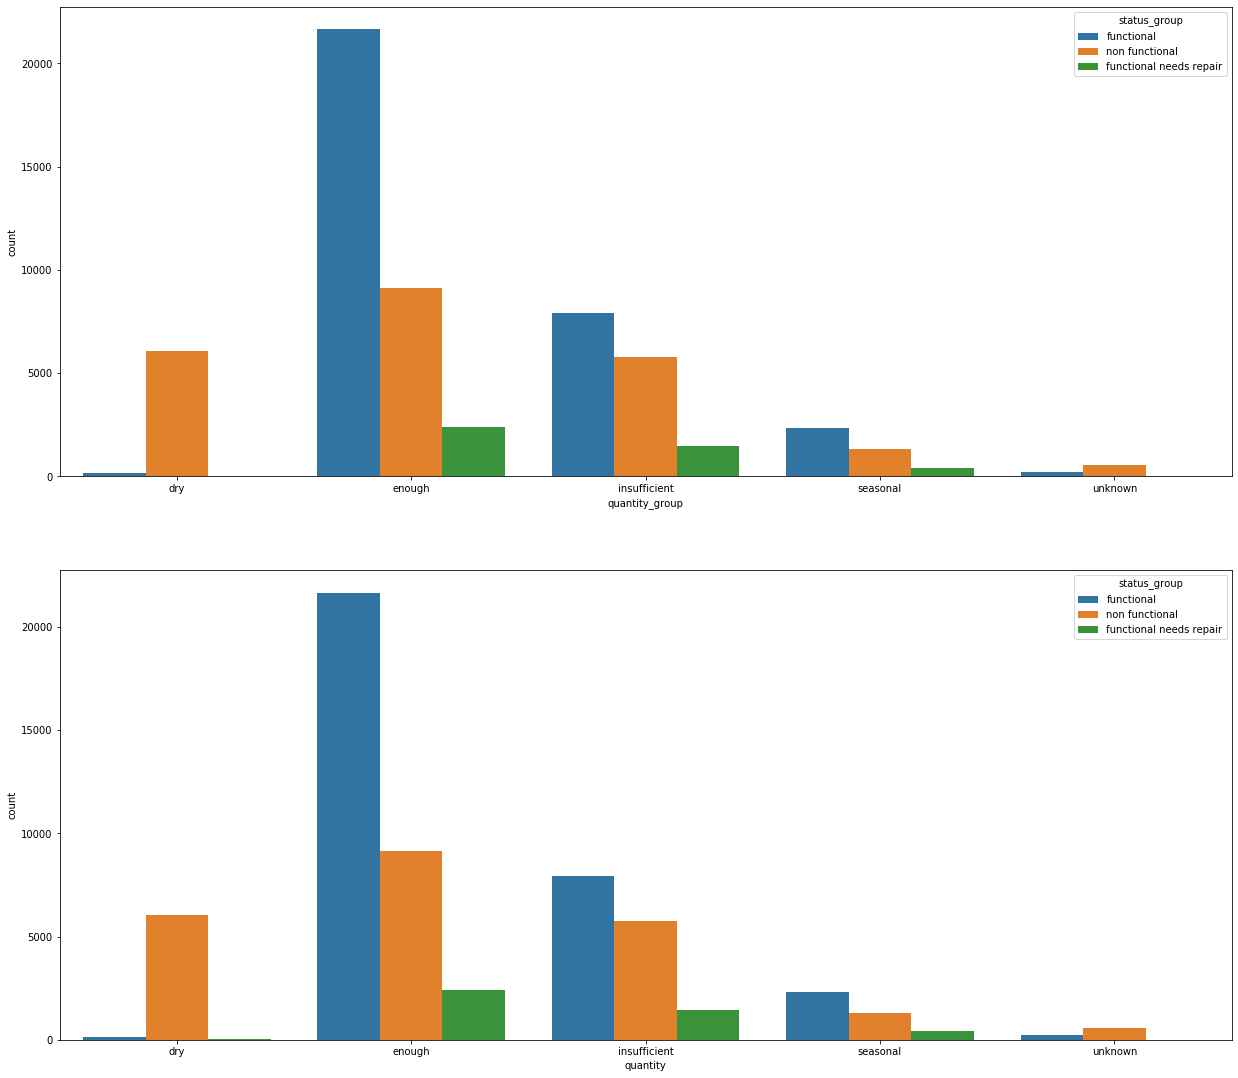

In [66]:
fig = plt.figure(figsize=(21,19))
gs = fig.add_gridspec(2, 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

sns.countplot(x='quantity_group', hue='status_group', data=df_train, ax=ax0)
sns.countplot(x='quantity', hue='status_group', data=df_train, ax=ax1)

identical values, so we will omit one of them, we will not include **quantity_group** in the base features

In [220]:
global_mean_feat.append('quantity')

In [68]:
global_base_features.append('quantity')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity']

source, source_type, source_class
--

In [69]:
df_train[['source_class','source_type','source']].drop_duplicates().sort_values(by=['source_class','source_type'])

,source_class,source_type,source
3,groundwater,borehole,machine dbh
66,groundwater,borehole,hand dtw
7,groundwater,shallow well,shallow well
0,groundwater,spring,spring
2,surface,dam,dam
1,surface,rainwater harvesting,rainwater harvesting
16,surface,river/lake,river
198,surface,river/lake,lake
5,unknown,other,other
3353,unknown,other,unknown


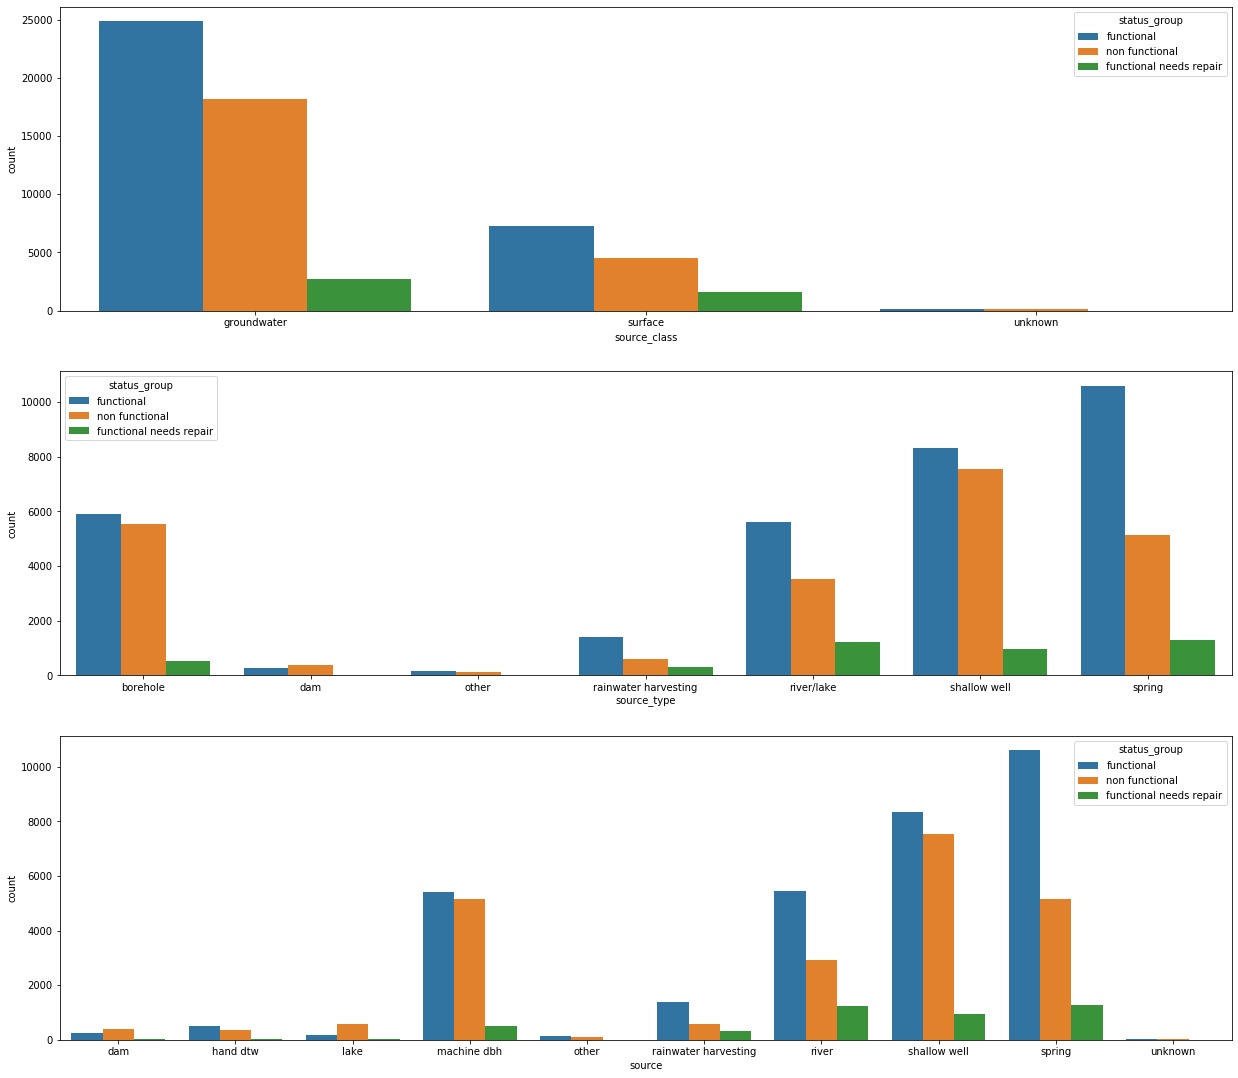

In [70]:
fig = plt.figure(figsize=(21,19))
gs = fig.add_gridspec(3, 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[2,0])

sns.countplot(x='source_class', hue='status_group', data=df_train, ax=ax0)
sns.countplot(x='source_type', hue='status_group', data=df_train, ax=ax1)
sns.countplot(x='source', hue='status_group', data=df_train, ax=ax2)

**all three features seem important and we are going to keep it for our base model.**

In [71]:
global_base_features.append('source')
global_base_features.append('source_class')
global_base_features.append('source_type')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'source_type']

In [221]:
global_mean_feat.append('source')

waterpoint_type, waterpoint_type_group
--

In [72]:
df_train[['waterpoint_type','waterpoint_type_group']].drop_duplicates()

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
6,hand pump,hand pump
10,other,other
24,improved spring,improved spring
828,cattle trough,cattle trough
5814,dam,dam


In [73]:
df_train.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [74]:
df_train.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [75]:
df_train.waterpoint_type.isnull().sum(),df_train.waterpoint_type_group.isnull().sum()

(0, 0)

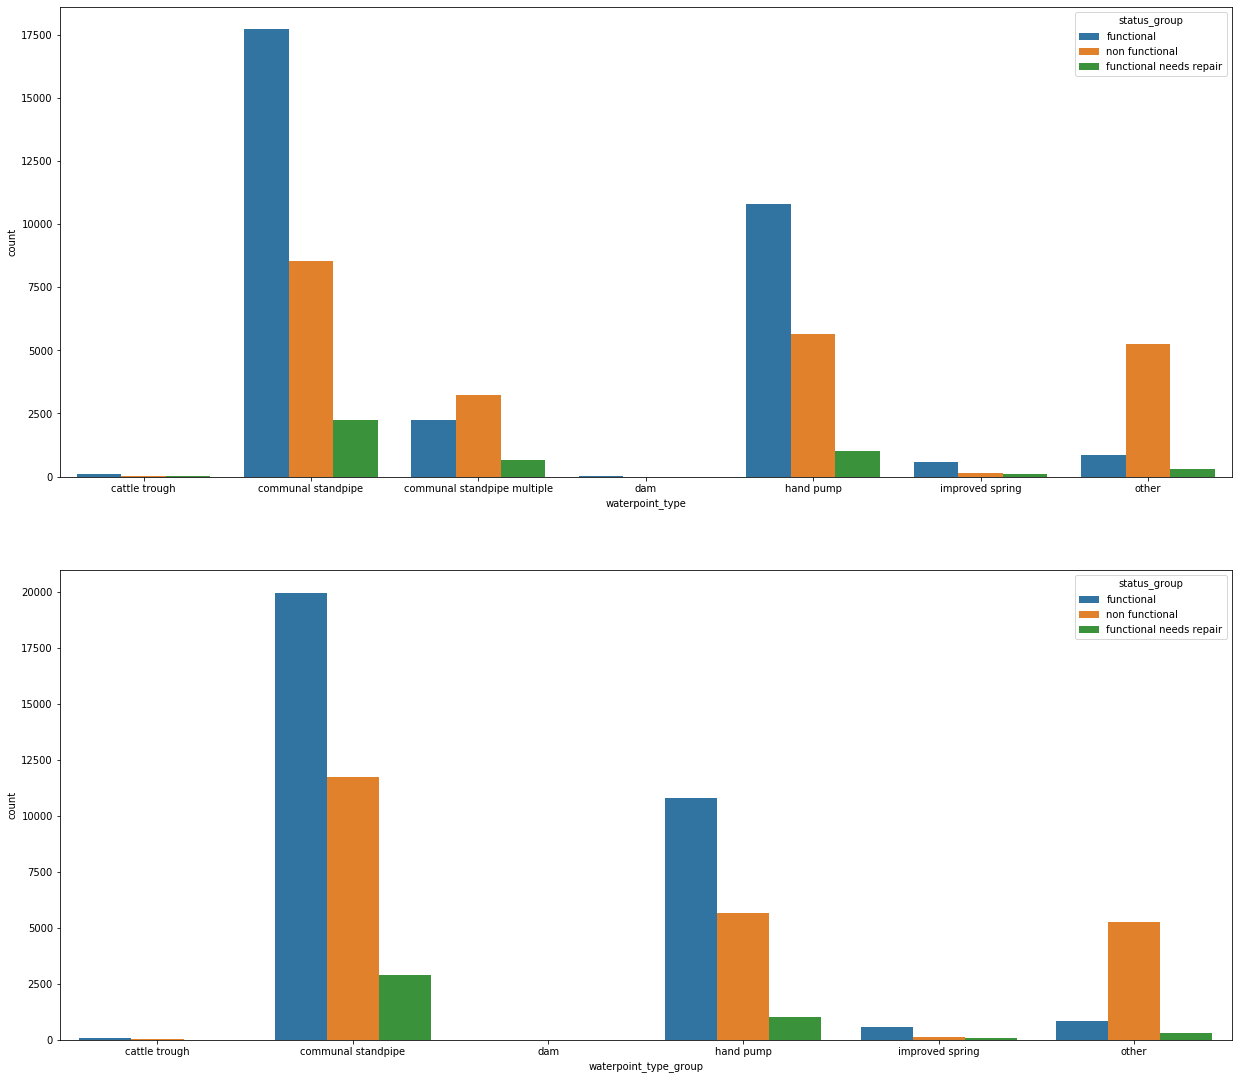

In [76]:
fig = plt.figure(figsize=(21,19))
gs = fig.add_gridspec(2, 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
sns.countplot(x='waterpoint_type', hue='status_group', data=df_train, ax=ax0)
sns.countplot(x='waterpoint_type_group', hue='status_group', data=df_train, ax=ax1)

In [77]:
global_base_features.append('waterpoint_type')
global_base_features.append('waterpoint_type_group')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'source_type',
 'waterpoint_type',
 'waterpoint_type_group']

# numeric features

In [78]:
df_numeric_ = df_train.select_dtypes(include='number')
numeric_cols = df_numeric_.columns
df_numeric_.info()
del df_numeric_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       59400 non-null  int64  
 1   amount_tsh               59400 non-null  float64
 2   gps_height               59400 non-null  int64  
 3   longitude                59400 non-null  float64
 4   latitude                 59400 non-null  float64
 5   num_private              59400 non-null  int64  
 6   population               59400 non-null  int64  
 7   construction_year        59400 non-null  int64  
 8   public_meeting_label     59400 non-null  int32  
 9   scheme_management_label  59400 non-null  int32  
 10  permit_label             59400 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 7.3 MB


- id: obviously, we won't delete    
- amount_tsh, let's see what it has and we will, plan accordingly

In [79]:
df_train[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03
public_meeting_label,59400.0,0.971027,0.374689,0.00000,1.000000,1.000000,1.000000,2.000000e+00
scheme_management_label,59400.0,7.540370,2.196393,0.00000,7.000000,7.000000,9.000000,1.200000e+01


### checking on the population

In [80]:
df_train.population.max(),df_train.population.min()

(30500, 0)

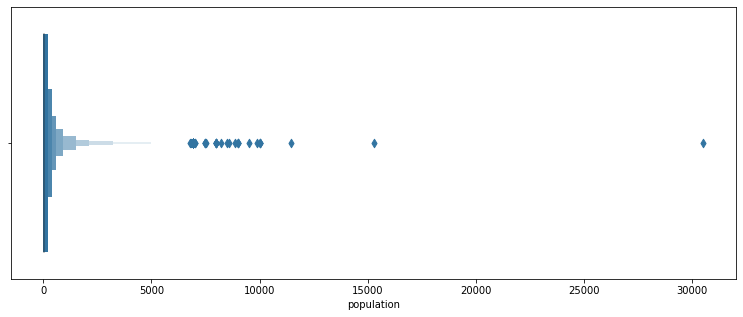

In [81]:
plt.figure(figsize=(13,5))
sns.boxenplot(df_train['population'])

the population of 30500 may seem an outlier, unless we investigate on it

In [82]:
df_train[df_train['population']>15000][['population','region','region_code','district_code','wpt_name']]

,population,region,region_code,district_code,wpt_name
14308,15300,Manyara,21,5,Mashineni
30537,30500,Tanga,4,3,Mkwajuni


In [83]:
df_train[df_train['region']=='Manyara'].population.sum()

503043

In [84]:
df_train[df_train['region']=='Tanga'].population.sum()

628482

confirmed through a little google, that the population seems to be ok.

### population by region 

In [85]:
gb_population_region = df_train.groupby(['region'],as_index=False).population.sum()

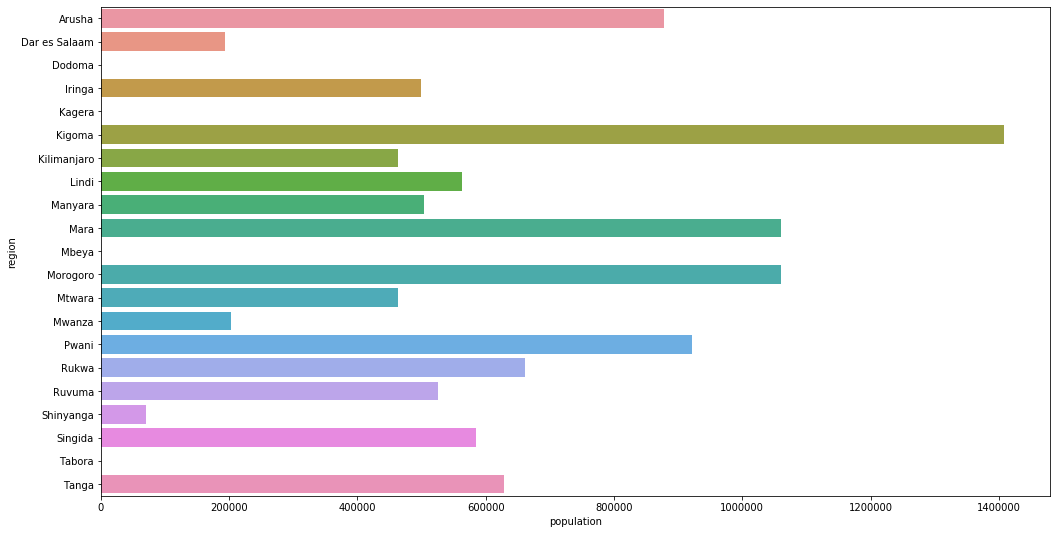

In [86]:
plt.figure(figsize=(17,9))
sns.barplot(x='population',y='region',data=gb_population_region)

so obviously, there are region with bigger population like Kigoma than there are regions such as Tabora and Shinyanga etc. 
more population means normally lesser resources and more usuage, and more usage tends to more non-functional or at least functional-needs-repair status. 

but let's try to see what are the facts for those regions which are densly populated.


**checking on the region and status group**

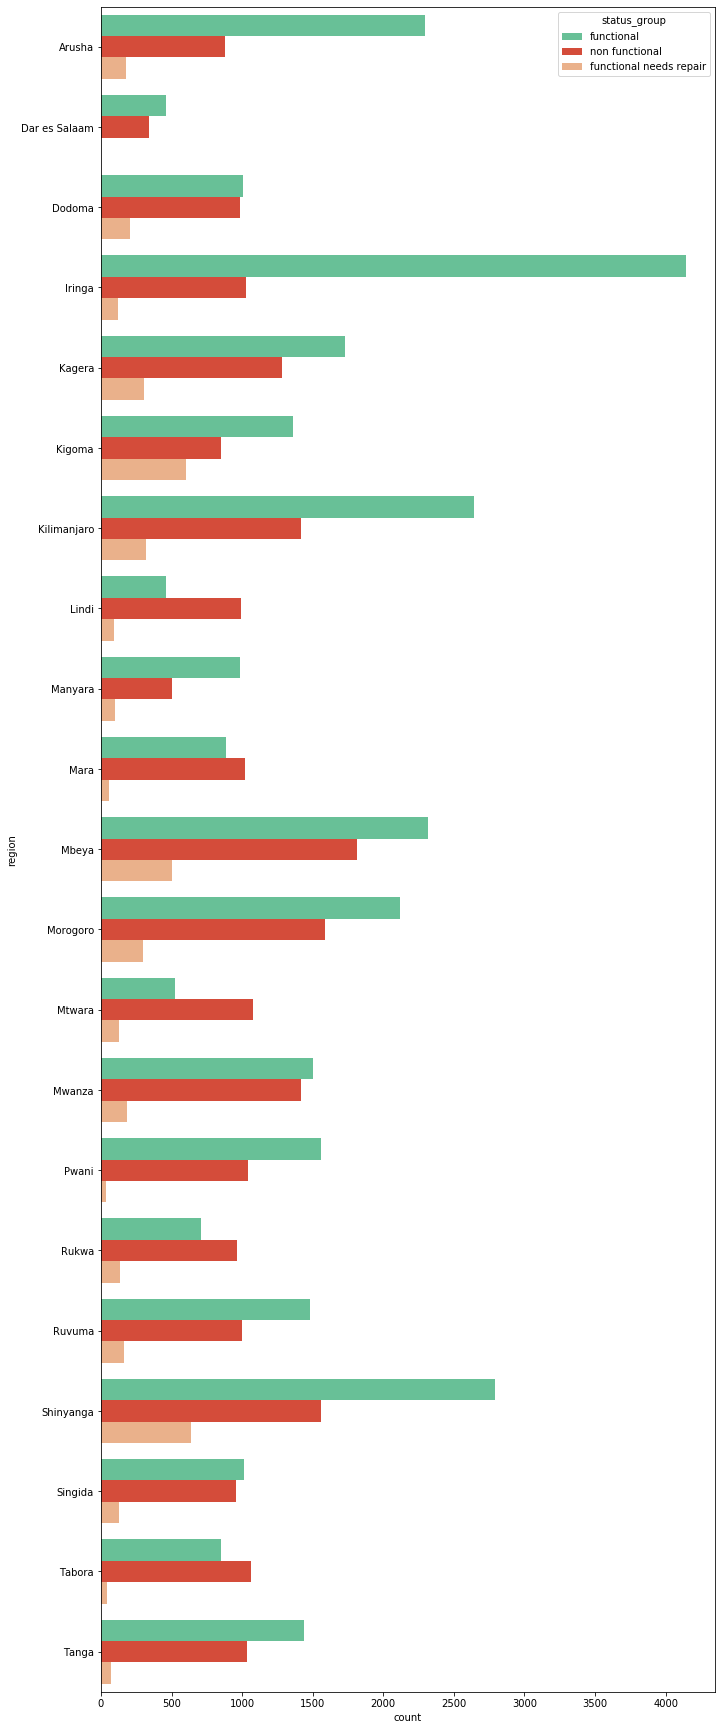

In [87]:
plt.figure(figsize=(11,31))
sns.countplot(y=df_train['region'], 
              hue=df_train['status_group'],
              palette=['#59cf98','#ed3821','#FAAE7B'])

In [88]:
gb_population_region['f_perc'] =\
gb_population_region['region'].apply(lambda x: \
(len(df_train[(df_train['region']==x)\
& (df_train['status_group']=='functional')]) / len(df_train[df_train['region']==x])*100 )) 


gb_population_region['nf_perc'] =\
gb_population_region['region'].apply(lambda x: \
(len(df_train[(df_train['region']==x)\
& (df_train['status_group']=='non functional')]) / len(df_train[df_train['region']==x])*100 )) 


gb_population_region['fr_perc'] =\
gb_population_region['region'].apply(lambda x: \
(len(df_train[(df_train['region']==x)\
& (df_train['status_group']=='functional needs repair')]) / len(df_train[df_train['region']==x])*100 )) 

In [89]:
gb_population_region['f_perc'] = gb_population_region['f_perc'].astype('float16')
gb_population_region['nf_perc'] = gb_population_region['nf_perc'].astype('float16')
gb_population_region['fr_perc'] = gb_population_region['fr_perc'].astype('float16')

In [90]:
gb_population_region.sort_values(by='f_perc', ascending=False)

,region,population,f_perc,nf_perc,fr_perc
3,Iringa,499247,78.25000,19.453125,2.324219
0,Arusha,878501,68.50000,26.296875,5.222656
8,Manyara,503043,62.34375,31.578125,6.062500
6,Kilimanjaro,463070,60.28125,32.343750,7.351562
14,Pwani,920896,59.06250,39.593750,1.366211
1,Dar es Salaam,193879,57.28125,42.375000,0.372559
20,Tanga,628482,56.37500,40.750000,2.865234
16,Ruvuma,525411,56.06250,37.718750,6.210938
17,Shinyanga,70251,55.96875,31.265625,12.742188
11,Morogoro,1060090,52.90625,39.625000,7.488281


### comparing functional vs non functional for region

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 21 artists>

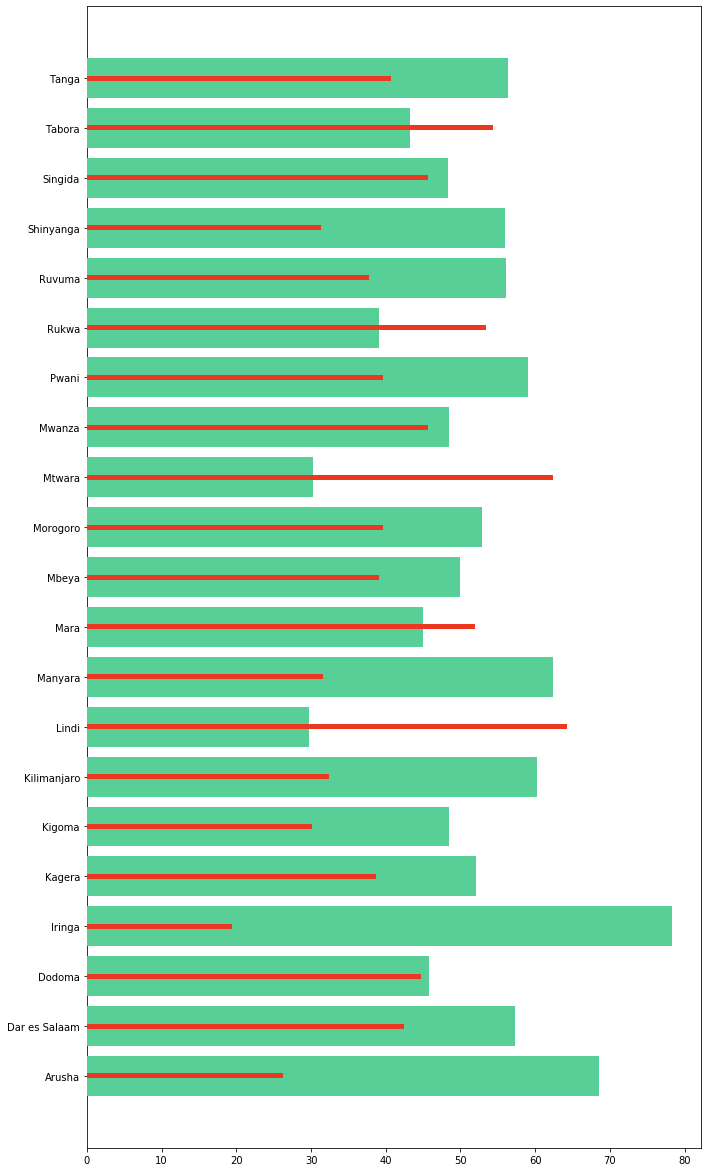

In [91]:
fig = plt.figure(figsize=(11,21))
ax = fig.add_subplot()
ax1 = fig.add_subplot()
ax.barh(gb_population_region['region'],gb_population_region['f_perc'] ,zorder=3, color='#59cf98')
ax1.barh(gb_population_region['region'],gb_population_region['nf_perc'] ,zorder=3, height=0.1,color='#ed3821')

this summarizes that we can create feature called **region_performance** as 
- poor (f_per <= 45)
- average (f_per >45 <=55)
- good (f_per > 55)

In [92]:
global_new_feat.append('region_perf')

In [93]:
global_base_features.append('population')
global_cols_to_del.append('population')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'source_type',
 'waterpoint_type',
 'waterpoint_type_group',
 'population']

In [94]:
global_new_feat

['region_perf']

while when we sort these by region, we don't get any feeling that the population has to do anything for the status group

in fact, there are certain regions where the population is 0, that is the population is not recorded. 

which leaves us but one choice at the moment, which is not to use the population feature for our model.


In [95]:
gb_population_region.sort_values(by='population', ascending=False)

,region,population,f_perc,nf_perc,fr_perc
5,Kigoma,1408681,48.40625,30.187500,21.406250
9,Mara,1060886,45.00000,51.968750,3.046875
11,Morogoro,1060090,52.90625,39.625000,7.488281
14,Pwani,920896,59.06250,39.593750,1.366211
0,Arusha,878501,68.50000,26.296875,5.222656
15,Rukwa,661359,39.09375,53.437500,7.468750
20,Tanga,628482,56.37500,40.750000,2.865234
18,Singida,584203,48.31250,45.593750,6.117188
7,Lindi,563370,29.75000,64.250000,6.015625
16,Ruvuma,525411,56.06250,37.718750,6.210938


also, the bigger population is not even having higher percentage for functional-needs-repair for example **Mara** region which has second highest population bt only 3% of functional that needs repair, in contrast we hav **Shinyanga** region which is the smallest, but big number of funcational-needs-repair


before we finally decide to put the population to columns_to_be_deleted, let's try this out w.r.t. to source type as well...

### population by source type

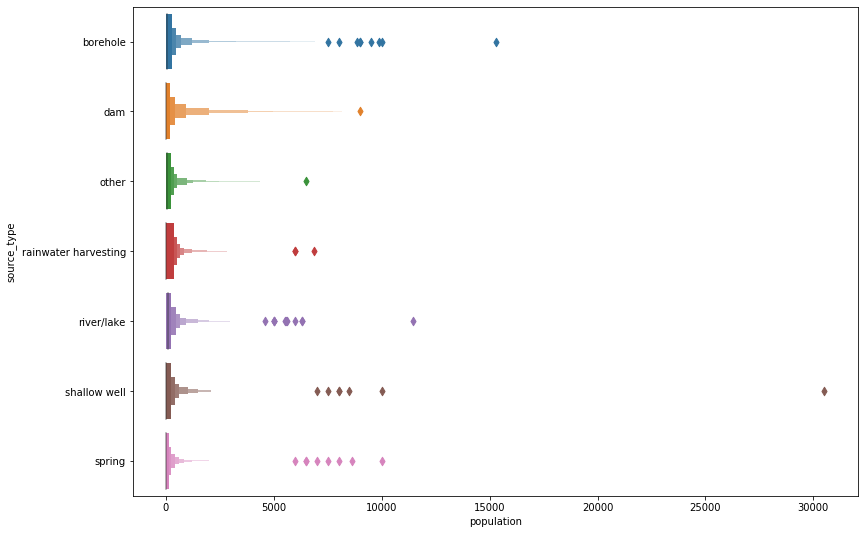

In [96]:
plt.figure(figsize=(13,9))
sns.boxenplot(x=df_train['population'], y=df_train['source_type'])

above shows that the population for certain source type is bigger than other for example
- shallow well and borehole kind of pumps are having bigger population
- dam and other have smaller population data points

what we should essentially see is that if there is some relationship between 

- 1: population and the status group (already seen above, when we check w.r.t. region)
- 2: the source type and the status group    

In [97]:
df_train[df_train['source_type']=='shallow well']\
['status_group'].value_counts()/len(df_train[df_train['source_type']=='shallow well'])*100

functional                 49.476938
non functional             44.834760
functional needs repair     5.688302
Name: status_group, dtype: float64

In [98]:
df_train[df_train['source_type']=='other']\
['status_group'].value_counts()/len(df_train[df_train['source_type']=='other'])*100

functional                 56.834532
non functional             41.366906
functional needs repair     1.798561
Name: status_group, dtype: float64

In [99]:
df_train[df_train['source_type']=='spring']\
['status_group'].value_counts()/len(df_train[df_train['source_type']=='spring'])*100

functional                 62.229011
non functional             30.274367
functional needs repair     7.496622
Name: status_group, dtype: float64

In [100]:
df_train['status_group'] = df_train['status_group'].astype('object')

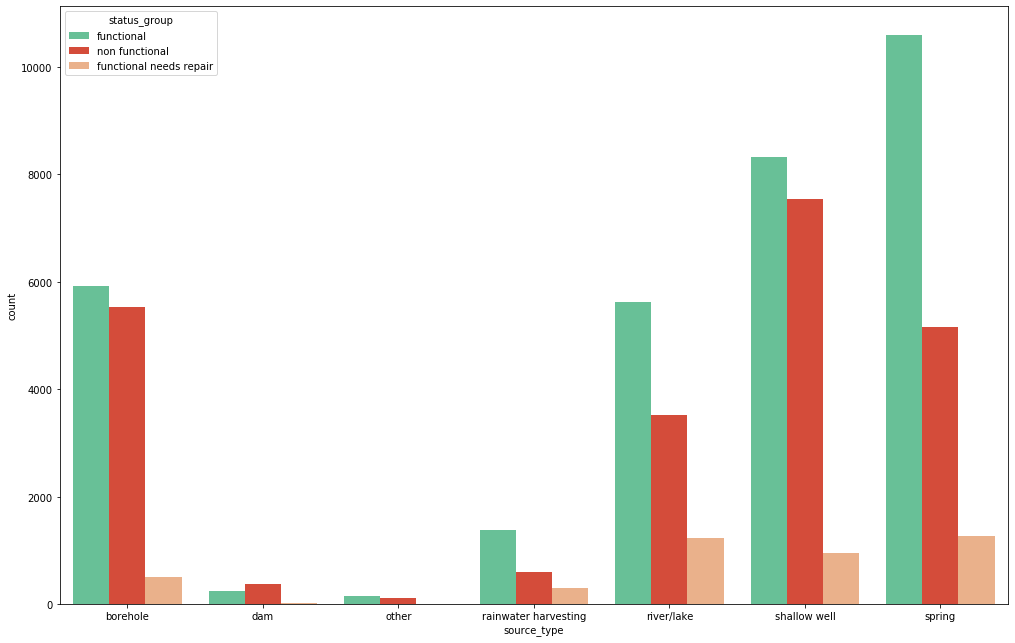

In [101]:
plt.figure(figsize=(17,11))
sns.countplot(x=df_train['source_type'], hue=df_train['status_group'],
             palette=['#59cf98','#ed3821','#FAAE7B'])

**I prefer to create a temporary dataset using the group by source_type for the sum of population, and adding the status_group percentage to that**

In [102]:
df_tmp_stype = df_train.groupby(['source_type'], as_index=False).population.sum().sort_values(by='population', ascending=False)

In [103]:
df_tmp_stype['nf_perc'] = \
df_tmp_stype['source_type'].apply(lambda x:\
                                 len(df_train[(df_train['source_type']==x) \
                                              & (df_train['status_group']=='non functional')])\
                                  /len(df_train[df_train['source_type']==x])*100)
                                  
    
df_tmp_stype['f_perc'] = \
df_tmp_stype['source_type'].apply(lambda x:\
                                 len(df_train[(df_train['source_type']==x) \
                                              & (df_train['status_group']=='functional')])\
                                  /len(df_train[df_train['source_type']==x])*100)


df_tmp_stype['fr_perc'] = \
df_tmp_stype['source_type'].apply(lambda x:\
                                 len(df_train[(df_train['source_type']==x) \
                                              & (df_train['status_group']=='functional needs repair')])\
                                  /len(df_train[df_train['source_type']==x])*100)


In [104]:
df_tmp_stype['nf_perc'] = df_tmp_stype['nf_perc'].astype('float16')
df_tmp_stype['f_perc'] = df_tmp_stype['f_perc'].astype('float16')
df_tmp_stype['fr_perc'] = df_tmp_stype['fr_perc'].astype('float16')

In [105]:
df_tmp_stype.sort_values(by='nf_perc', ascending=False)

,source_type,population,nf_perc,f_perc,fr_perc
1,dam,175418,57.781250,38.56250,3.658203
0,borehole,2906899,46.218750,49.53125,4.250000
5,shallow well,2974262,44.843750,49.46875,5.687500
2,other,50460,41.375000,56.84375,1.798828
4,river/lake,2158257,33.906250,54.21875,11.882812
6,spring,1935323,30.281250,62.21875,7.496094
3,rainwater harvesting,486034,25.921875,60.40625,13.679688


what we noticed from here is that certain source types have more functional than non functional such as
- rainwater harvesting
- spring
- river/lake
- other

which have more than 50% functional pumps
while the others are average performing types, such as 

- shallow well
- borehole 
- dam etc. 


ideally, we can use this in advance feature engineering, and create a feature that we could extract from this behaviour is **source_type_performance** which can be 

- if f_perc > 50 then **good**
- else **average**

it is clear that bigger population doesn't guarantee us a better or worse status_group, as we can see that 
rainwater harvesting has 60% functional with being smallest population, while the 2nd and 3rd are spring and river/lake which are bigger population but still they have fairly big number of functional pumps

In [106]:
global_new_feat.append('source_type_perf')

In [107]:
global_cols_to_del

['recorded_by',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'population']

### checking on num_private

In [108]:
df_train['num_private'].unique()

array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402],
      dtype=int64)

In [109]:
df_train.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [110]:
df_train.num_private.isnull().sum()

0

by the values, we can conclude two things
- num_private is some numeric integer value
- num_private whenever was left out, defaults to zero, which is why we have around 58k zeros

this leaves us no choice but to discard this feature for time being. 
although, we will use this feature in our base feature set, but base_refined feature set, we are going to discard it for sure.

In [111]:
global_base_features.append('num_private')
global_cols_to_del.append('num_private')

In [112]:
global_cols_to_del

['recorded_by',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'population',
 'num_private']

### amount_tsh

In [113]:
df_train['amount_tsh'].nunique()

98

In [114]:
df_train['amount_tsh'].value_counts().sort_values().tail(25)

7.0          69
6000.0      125
2500.0      139
2400.0      145
4000.0      156
600.0       176
6.0         190
1500.0      197
1200.0      267
3000.0      334
25.0        356
5.0         376
5000.0      450
300.0       557
250.0       569
2000.0      704
30.0        743
10.0        806
100.0       816
200.0      1220
20.0       1463
1000.0     1488
50.0       2472
500.0      3102
0.0       41639
Name: amount_tsh, dtype: int64

41k records with amount_tsh seems like some is kind of wrong data entry.

In [115]:
len(df_train[df_train['amount_tsh']==0])/len(df_train) * 100 , len(df_train[df_train['amount_tsh']!=0])/len(df_train)*100

(70.09932659932659, 29.9006734006734)

what we can essentially do is, to create a feature out of it called amount_zero 
- 1 means the zero_amount_tsh is zero
- 0 is otherwise. 
and will try to see what changes would it bring to the table.

In [116]:
df_train[df_train['amount_tsh']==0].status_group.value_counts()

functional                 19706
non functional             18885
functional needs repair     3048
Name: status_group, dtype: int64

In [117]:
df_train[df_train['amount_tsh']!=0].status_group.value_counts()

functional                 12553
non functional              3939
functional needs repair     1269
Name: status_group, dtype: int64

so the results do confirm that making a feature for the zero_amount_tsh does help

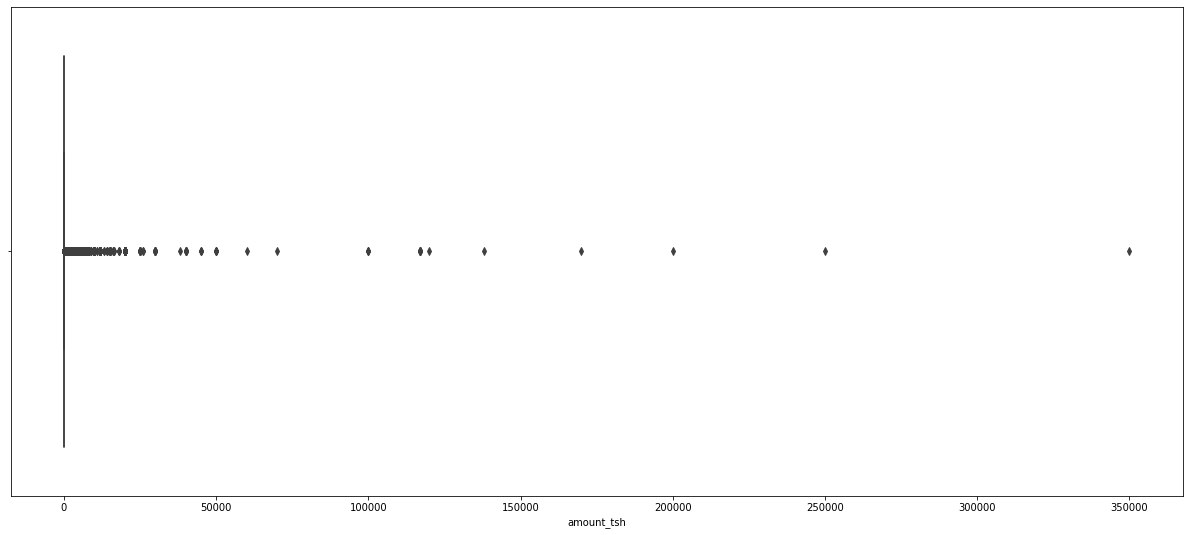

In [118]:
fig, ax = plt.subplots(figsize=(21,9))
sns.boxplot(df_train.amount_tsh)

at the moment, if we go with the feature amount_tsh_zero, then there is no need to keep the amount_tsh feature, so will probably discard it 

In [119]:
global_new_feat.append('amount_tsh_zero')
global_base_features.append('amount_tsh')
global_cols_to_del.append('amount_tsh')
global_cols_to_del

['recorded_by',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'population',
 'num_private',
 'amount_tsh']

### gps_height

0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   region_code        59400 non-null  int64  
 7   district_code      59400 non-null  int64  
 8   population         59400 non-null  int64  
 9   construction_year  59400 non-null  int64  

In [120]:
df_train['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

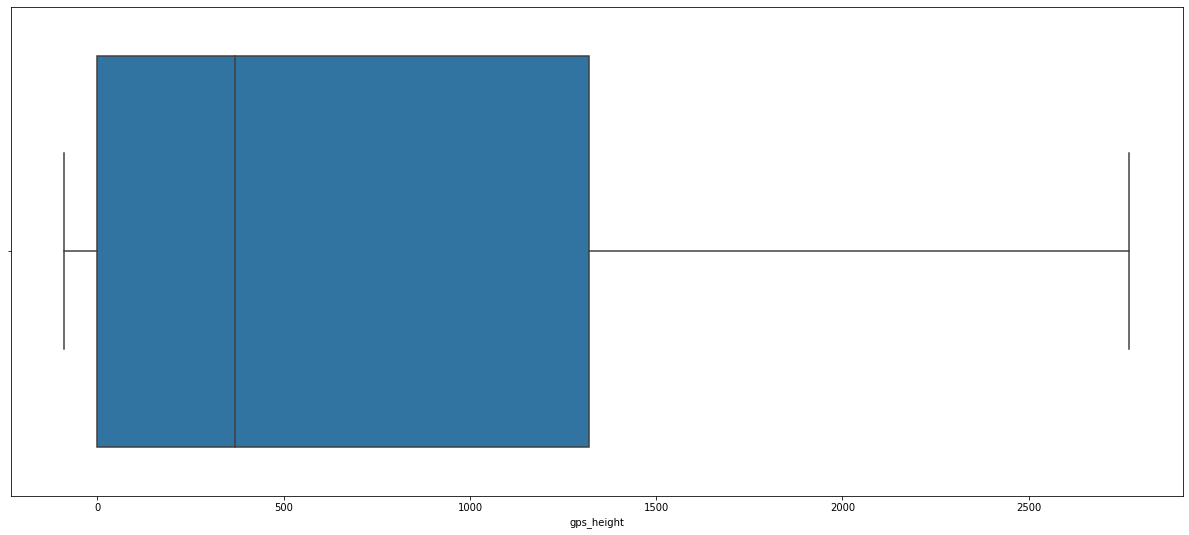

In [121]:
fig, ax = plt.subplots(figsize=(21,9))
sns.boxplot(df_train.gps_height)

In [122]:
df_train.gps_height.describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

this feature may be important, in terms of prediction, and status of the water pump.
we will try to further explore and see what effect does it have on the status_group
as well as if there are some nulls in it or not.

In [123]:
df_train.gps_height.isnull().sum()

0

In [124]:
df_train.isnull().sum()/len(df_train)*100

id                          0.000000
amount_tsh                  0.000000
date_recorded               0.000000
funder                      6.119529
gps_height                  0.000000
installer                   6.153199
longitude                   0.000000
latitude                    0.000000
wpt_name                    0.000000
num_private                 0.000000
basin                       0.000000
subvillage                  0.624579
region                      0.000000
region_code                 0.000000
district_code               0.000000
lga                         0.000000
ward                        0.000000
population                  0.000000
public_meeting              5.612795
recorded_by                 0.000000
scheme_management           6.526936
scheme_name                47.417508
permit                      5.144781
construction_year           0.000000
extraction_type             0.000000
extraction_type_group       0.000000
extraction_type_class       0.000000
m

so gps_height has no nulls, let's see if we have height devided into two 

gps_height up to a certain height and below certain height, would have some effect on it or not

the mean is 668, so let's try to see if it has some clear divide into the status_group distribution or not

In [125]:
len(df_train[df_train['gps_height'] < 668]), len(df_train[df_train['gps_height'] >= 668])

(32793, 26607)

In [126]:
df_train[df_train['gps_height'] < 668].status_group.value_counts()

functional                 16422
non functional             14009
functional needs repair     2362
Name: status_group, dtype: int64

In [127]:
df_train[df_train['gps_height'] >= 668].status_group.value_counts()

functional                 15837
non functional              8815
functional needs repair     1955
Name: status_group, dtype: int64

i guess, this gives us a pattern that low gps height has more non functional and the bigger value. 
so for advance feature engineering, we can create a new feature called gps_gt_668 with 1 and 0 respectively

In [128]:
global_base_features.append('gps_height')
global_new_feat.append('gps_gt_668')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'source_type',
 'waterpoint_type',
 'waterpoint_type_group',
 'population',
 'num_private',
 'amount_tsh',
 'gps_height']

### construction_year 

In [129]:
df_train['construction_year'].nunique()

55

In [130]:
df_train['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [131]:
df_train['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

there are around 20k pumps with the construction year as 0, which is again a typo in the data entry. 

In [132]:
len(df_train[df_train['construction_year']==0]),len(df_train[df_train['construction_year']!=0])

(20709, 38691)

In [133]:
df_train[df_train['construction_year']==0].status_group.value_counts()/len(df_train[df_train['construction_year']==0])*100

functional                 50.968178
non functional             40.393066
functional needs repair     8.638756
Name: status_group, dtype: float64

In [134]:
df_train[df_train['construction_year']!=0].status_group.value_counts()/len(df_train[df_train['construction_year']!=0])*100

functional                 56.095733
non functional             37.370448
functional needs repair     6.533819
Name: status_group, dtype: float64

In [135]:
df_train.construction_year.isnull().sum()

0

we'll most probably go for another feature here that would call cons_year_zero with 1 and 0 to tell if it is zero or not

let's further research about the construction year zero, what we noticed is 
- non functional is slightly higher than where the year is not zero
- functional needs repair is also higher as well
they seem old, but not sure how old, we will also try to look at the amount_tsh if it is also zero.

In [136]:
global_new_feat.append('cons_year_zero')

we may also try to explore if the age of the water pump has anything to do with the status_group

In [137]:
df_train['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [138]:
len(df_train[df_train['construction_year']<1986]),len(df_train[df_train['construction_year']>=1986])

(29658, 29742)

In [139]:
df_train[df_train['construction_year']<1986].status_group.value_counts()

non functional             13611
functional                 13572
functional needs repair     2475
Name: status_group, dtype: int64

In [140]:
df_train[df_train['construction_year']>=1986].status_group.value_counts()

functional                 18687
non functional              9213
functional needs repair     1842
Name: status_group, dtype: int64

so a clear difference 

In [141]:
global_base_features.append('construction_year')
global_new_feat.append('pump_age_group')
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'source_type',
 'waterpoint_type',
 'waterpoint_type_group',
 'population',
 'num_private',
 'amount_tsh',
 'gps_height',
 'construction_year']

In [142]:
global_new_feat

['region_perf',
 'source_type_perf',
 'amount_tsh_zero',
 'gps_gt_668',
 'cons_year_zero',
 'pump_age_group']

In [143]:
df_train[df_train['construction_year']==0].tail(5).T

,59384,59392,59393,59397,59398
id,72148,40607,48348,37057,31282
amount_tsh,0,0,0,0,0
date_recorded,2011-07-10,2011-04-15,2012-10-27,2011-04-11,2011-03-08
funder,Concern,Government Of Tanzania,Private,NaN,Malec
gps_height,0,0,0,0,0
installer,CONCERN,Government,Private,NaN,Musa
longitude,30.6678,33.0094,33.8669,34.0171,35.8613
latitude,-2.48371,-8.52089,-4.28741,-8.75043,-6.37857
wpt_name,Chamkube,Benard Charles,Kwa Peter,Mashine,Mshoro
num_private,0,0,0,0,0


In [144]:
df_train[df_train['construction_year']==0].head(5).T

,4,6,7,8,9
id,19728,19816,54551,53934,46144
amount_tsh,0,0,0,0,0
date_recorded,2011-07-13,2012-10-01,2012-10-09,2012-11-03,2011-08-03
funder,Action In A,Dwsp,Rwssp,Wateraid,Isingiro Ho
gps_height,0,0,0,0,0
installer,Artisan,DWSP,DWE,Water Aid,Artisan
longitude,31.1308,33.3624,32.6206,32.7111,30.627
latitude,-1.82536,-3.76636,-4.2262,-5.14671,-1.25705
wpt_name,Shuleni,Kwa Ngomho,Tushirikiane,Kwa Ramadhan Musa,Kwapeto
num_private,0,0,0,0,0


noticing that wherever the contruction year is 0, we have 
- num_private 0
- population 0 
- amount_tsh 0

let's verify 

In [145]:
df_train[df_train['construction_year']==0][['num_private','population','amount_tsh']].drop_duplicates()

,num_private,population,amount_tsh
4,0,0,0.0
34,0,100,0.0
131,0,150,20.0
145,0,150,50.0
181,0,32,0.0
...,...,...,...
57038,0,465,10.0
57098,0,37,0.0
57975,0,1010,50.0
58934,0,550,10.0


In [146]:
df_train[df_train['construction_year']==0]['num_private'].value_counts()

0      20688
14         3
150        3
5          3
1          3
7          2
34         2
16         2
111        1
27         1
20         1
Name: num_private, dtype: int64

majority is zero, wherever the contruction year is 0

In [147]:
df_train[df_train['construction_year']==0]['population'].value_counts()

0       20034
1         104
100        37
150        31
200        30
        ...  
407         1
6500        1
215         1
167         1
326         1
Name: population, Length: 190, dtype: int64

In [148]:
df_train[df_train['construction_year']==0]['amount_tsh'].value_counts()

0.0         20302
1000.0         89
2400.0         81
1200.0         46
50.0           40
20.0           25
30.0           20
10.0           19
100.0          11
500.0          10
2000.0          9
300.0           8
25.0            8
5000.0          7
40.0            5
200.0           5
15000.0         4
6000.0          3
6.0             2
3600.0          2
20000.0         2
0.2             2
200000.0        1
150.0           1
7.0             1
306.0           1
30000.0         1
50000.0         1
9.0             1
10000.0         1
250.0           1
Name: amount_tsh, dtype: int64

In [149]:
# filters
yr_zero = df_train['construction_year']==0
np_zero = df_train['num_private']==0
pop_zero = df_train['population']==0
ath_zero = df_train['amount_tsh']==0

len(df_train[yr_zero & np_zero & pop_zero & ath_zero])/len(df_train)*100

33.34343434343434

In [150]:
df_train[yr_zero & np_zero & pop_zero & ath_zero].status_group.value_counts()

functional                 10115
non functional              7948
functional needs repair     1743
Name: status_group, dtype: int64

In [151]:
df_train[yr_zero & np_zero & pop_zero & ath_zero].status_group.value_counts()\
/len(df_train[yr_zero & np_zero & pop_zero & ath_zero])*100

functional                 51.070383
non functional             40.129254
functional needs repair     8.800364
Name: status_group, dtype: float64

In [152]:
# filters
yr_zero = df_train['construction_year']!=0
np_zero = df_train['num_private']!=0
pop_zero = df_train['population']!=0
ath_zero = df_train['amount_tsh']!=0

len(df_train[yr_zero | np_zero | pop_zero | ath_zero])/len(df_train)*100

66.65656565656566

In [153]:
df_train[yr_zero | np_zero | pop_zero | ath_zero].status_group.value_counts()

functional                 22144
non functional             14876
functional needs repair     2574
Name: status_group, dtype: int64

In [154]:
df_train[yr_zero | np_zero | pop_zero | ath_zero].status_group.value_counts()\
/len(df_train[yr_zero | np_zero | pop_zero | ath_zero])*100

functional                 55.927666
non functional             37.571349
functional needs repair     6.500985
Name: status_group, dtype: float64

so, based on above, if all four of these param are zero, we may create another feature called all zero, to see if it contributes or not

In [155]:
global_new_feat.append('all_zeros')

# Object Features

In [156]:
df_numeric_ = df_train.select_dtypes(include='object')
numeric_cols = df_numeric_.columns
df_numeric_.info()
del df_numeric_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_recorded  59400 non-null  object
 1   funder         55765 non-null  object
 2   installer      55745 non-null  object
 3   wpt_name       59400 non-null  object
 4   subvillage     59029 non-null  object
 5   lga            59400 non-null  object
 6   ward           59400 non-null  object
 7   scheme_name    31234 non-null  object
 8   status_group   59400 non-null  object
dtypes: object(9)
memory usage: 7.0+ MB


### date_recorded

In [157]:
df_train['date_recorded'].nunique()

356

date_recorded is just a data entry date, but maybe possible it contains some patterns

to check whether date_recorded has something to do with the status_group, let us extract the year out of it, and see how it goes


In [158]:
df_train['record_yr'] = df_train['date_recorded'].apply(lambda x : x[:4])
df_train['record_yr'].unique()

array(['2011', '2013', '2012', '2004', '2002'], dtype=object)

In [159]:
df_train['record_yr'] = df_train['record_yr'].astype('int16')

In [160]:
df_train['record_yr'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: record_yr, dtype: int64

In [161]:
df_train[df_train['record_yr']==2011].status_group.value_counts()

functional                 16220
non functional             10642
functional needs repair     1812
Name: status_group, dtype: int64

In [162]:
df_train[df_train['record_yr']==2013].status_group.value_counts()

functional                 12902
non functional              9227
functional needs repair     2142
Name: status_group, dtype: int64

In [163]:
df_train[df_train['record_yr']==2012].status_group.value_counts()

functional                 3126
non functional             2936
functional needs repair     362
Name: status_group, dtype: int64

In [164]:
df_train[df_train['record_yr']==2004].status_group.value_counts()

non functional             19
functional                 10
functional needs repair     1
Name: status_group, dtype: int64

In [165]:
df_train[df_train['record_yr']==2002].status_group.value_counts()

functional    1
Name: status_group, dtype: int64

In [166]:
df_train[df_train['record_yr']<=2011].status_group.value_counts()

functional                 16231
non functional             10661
functional needs repair     1813
Name: status_group, dtype: int64

In [167]:
df_train[df_train['record_yr']>2011].status_group.value_counts()

functional                 16028
non functional             12163
functional needs repair     2504
Name: status_group, dtype: int64

shows no connection or good pattern that would help the model in my opinion.. so will go by deleting both date_recorded and record_yrm

In [168]:
global_cols_to_del.append('date_recorded')
global_cols_to_del.append('record_yr')
global_cols_to_del

['recorded_by',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'population',
 'num_private',
 'amount_tsh',
 'date_recorded',
 'record_yr']

### funder

In [169]:
df_train['funder'].nunique()

1897

In [170]:
df_train['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Simon Lusambi                1
Sakwidi                      1
Ambwene Mwaikek              1
Tareto                       1
Gurdians                     1
Name: funder, Length: 1897, dtype: int64

In [171]:
filter_govt = df_train['funder']=='Government Of Tanzania'
df_train[filter_govt].status_group.value_counts()/len(df_train[filter_govt])*100

non functional             51.332012
functional                 40.951123
functional needs repair     7.716865
Name: status_group, dtype: float64

In [172]:
df_train[filter_govt==False].status_group.value_counts()/len(df_train[filter_govt==False])*100

functional                 56.719533
non functional             36.093887
functional needs repair     7.186581
Name: status_group, dtype: float64

there's not much difference, so we will for time being not use the funder attribute

but in order to capture the non-functional and repair status groups, we will try to create an advanced mean encoded feature
for funder... and will see how it goes.

In [173]:
global_base_features.append('funder')

global_cols_to_del

['recorded_by',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'quality_group',
 'population',
 'num_private',
 'amount_tsh',
 'date_recorded',
 'record_yr']

In [222]:
global_mean_feat.append('funder')

### installer

In [174]:
df_train['installer'].nunique()

2145

In [175]:
df_train['installer'].value_counts()

DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
CRISTAN OUTRICH        1
Crety                  1
Bao                    1
Magoma ADP             1
Bhoke Mwita            1
Name: installer, Length: 2145, dtype: int64

we will probably not use it, like funder 

In [176]:
global_cols_to_del.append('funder')

### wpt_name 

In [177]:
df_train['wpt_name'].nunique()

37400

In [178]:
df_train.wpt_name.unique()

array(['none', 'Zahanati', 'Kwa Mahundi', ..., 'Kwa Yahona Kuvala',
       'Mshoro', 'Kwa Mzee Lugawa'], dtype=object)

In [179]:
df_train.wpt_name.isnull().sum()

0

In [180]:
global_cols_to_del.append('wpt_name')

### subvillage

In [181]:
df_train['subvillage'].nunique()

19287

In [182]:
global_cols_to_del.append('subvillage')

### lga

or Local Government Association

In [183]:
df_train['lga'].nunique()

125

In [184]:
global_base_features.append('lga')

since there are around 125 values, I would go for either of the two solutions

-a: label encode all the lda, since there is a possibility that certain lga is performing good and certain is not
-b: create a mean encoding for the lda with the status_group, and use it instead

i would go for option a in the start

### ward
ward is an administrative division of a city that would come under the lga.

In [185]:
print(df_train['ward'].nunique())
print(df_train['ward'].value_counts() )

2092
Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Kinungu        1
Mkumbi         1
Uchindile      1
Sungwisi       1
Simbay         1
Name: ward, Length: 2092, dtype: int64


there are 2092 distinct values... and I don't think we will at the moment, go in that level of details. 

In [186]:
global_cols_to_del.append('ward')

# Advance Feature Generation

In [187]:
global_new_feat

['region_perf',
 'source_type_perf',
 'amount_tsh_zero',
 'gps_gt_668',
 'cons_year_zero',
 'pump_age_group',
 'all_zeros']

In [188]:
def get_region_performance(region):
    '''
    this function summarizes that we can create feature called region_performance as
        poor (f_per <= 45)
        average (f_per >45 <=65)
        good (f_per > 65)
    '''
    
    region_filter = df_train['region']==region
    functional_filter = df_train['status_group']=='functional'
    
    region_f_perc = len(df_train[(region_filter) & (functional_filter)]) / len(df_train[region_filter]) *100  
    region_f_perc = float(region_f_perc)
    
    if region_f_perc <= 30:
        return 'poor'
    elif (region_f_perc > 30) & (region_f_perc<= 60):
        return 'average'
    elif region_f_perc > 60:
        return 'good'

def source_type_perf(stype):
    '''
    if the functional_percentage > 50 .. good else average
    '''
    
    stype_filter = df_train['source_type']==stype
    functional_filter = df_train['status_group']=='functional'

    st_f_perc = len(df_train[(stype_filter) & (functional_filter)]) / len(df_train[stype_filter]) *100  
    
    if st_f_perc < 50:
        return 'average'
    else: 
        return 'good'
    

def get_pump_age_group(cons_year):
    try:
        yr = cons_year
        if yr < 2000:
            return 'old'
        elif yr >= 2001 and yr < 2010:
            return 'semi old'
        else:
            return 'new'
    except:
        return -1
    
def get_all_zeros(cols):
    # filters
    if int(cols[0])==0 & int(cols[1])==0 & int(cols[2])==0 & int(cols[3])==0: 
        return 1
    else: 
        return 0
    
def label_encode(dfX):
    # apply label encoding
    dfX['region_perf'] = le.fit_transform(dfX['region_perf'])
    dfX['source_type_perf'] = le.fit_transform(dfX['source_type_perf'])    
    dfX['pump_age_group'] = le.fit_transform(dfX['pump_age_group'])
    dfX['basin'] = le.fit_transform(dfX['basin'])
    dfX['region'] = le.fit_transform(dfX['region'])
    dfX['extraction_type_group'] = le.fit_transform(dfX['extraction_type_group'])
    dfX['extraction_type_class'] = le.fit_transform(dfX['extraction_type_class'])
    dfX['extraction_type'] = le.fit_transform(dfX['extraction_type'])
    dfX['management'] = le.fit_transform(dfX['management'])
    dfX['management_group'] = le.fit_transform(dfX['management_group'])
    dfX['payment'] = le.fit_transform(dfX['payment'])
    dfX['payment_type'] = le.fit_transform(dfX['payment_type'])
    dfX['water_quality'] = le.fit_transform(dfX['water_quality'])
    dfX['quality_group'] = le.fit_transform(dfX['quality_group'])
    dfX['quantity'] = le.fit_transform(dfX['quantity'])
    dfX['source'] = le.fit_transform(dfX['source'])
    dfX['source_class'] = le.fit_transform(dfX['source_class'])
    dfX['source_type'] = le.fit_transform(dfX['source_type'])
    dfX['waterpoint_type'] = le.fit_transform(dfX['waterpoint_type'])
    dfX['funder'] = le.fit_transform(dfX['funder'])
    dfX['lga'] = le.fit_transform(dfX['lga'])
    dfX['district_code'] = le.fit_transform(dfX['district_code'])
    dfX['region_code'] = le.fit_transform(dfX['region_code'])
    dfX['waterpoint_type_group'] = le.fit_transform(dfX['waterpoint_type_group'])
    
    return dfX
    
def down_cast(dfX):
    # down casting
    dfX['district_code'] = dfX['district_code'].astype('int8')
    dfX['basin'] = dfX['basin'].astype('int8')
    dfX['region'] = dfX['region'].astype('int8')
    dfX['region_code'] = dfX['region_code'].astype('int8')
    dfX['public_meeting_label'] = dfX['public_meeting_label'].astype('int8')
    dfX['scheme_management_label'] = dfX['scheme_management_label'].astype('int8')
    dfX['permit_label'] = dfX['permit_label'].astype('int8')
    dfX['extraction_type_group'] = dfX['extraction_type_group'].astype('int8')
    dfX['extraction_type_class'] = dfX['extraction_type_class'].astype('int8')
    dfX['extraction_type'] = dfX['extraction_type'].astype('int8')
    dfX['management'] = dfX['management'].astype('int8')
    dfX['management_group'] = dfX['management_group'].astype('int8')
    dfX['payment'] = dfX['payment'].astype('int8')
    dfX['payment_type'] = dfX['payment_type'].astype('int8')
    dfX['water_quality'] = dfX['water_quality'].astype('int8')
    dfX['quality_group'] = dfX['quality_group'].astype('int8')
    dfX['quantity'] = dfX['quantity'].astype('int8')
    dfX['source'] = dfX['source'].astype('int8')
    dfX['source_type'] = dfX['source_type'].astype('int8')
    dfX['source_class'] = dfX['source_class'].astype('int8')
    dfX['waterpoint_type_group'] = dfX['waterpoint_type_group'].astype('int8')
    dfX['waterpoint_type'] = dfX['waterpoint_type'].astype('int8')
    dfX['population'] = dfX['population'].astype('int16')
    dfX['num_private'] = dfX['num_private'].astype('int16')
    dfX['amount_tsh'] = dfX['amount_tsh'].astype('int16')
    dfX['gps_height'] = dfX['gps_height'].astype('int16')
    dfX['construction_year'] = dfX['construction_year'].astype('int16')
    dfX['funder'] = dfX['funder'].astype('int16')
    dfX['lga'] = dfX['lga'].astype('int16')
    dfX['amount_tsh_zero'] = dfX['amount_tsh_zero'].astype('int8')
    dfX['gps_gt_668'] = dfX['gps_gt_668'].astype('int8')
    dfX['cons_year_zero'] = dfX['cons_year_zero'].astype('int8')
    dfX['all_zeros'] = dfX['all_zeros'].astype('int8')
    dfX['longitude'] = dfX['longitude'].astype('float16')
    dfX['latitude'] = dfX['latitude'].astype('float16')
    
    return dfX
    

# Concatenating the Train and Test
the reason to do this is to make sure that we save efforts for all the changes, we would've done to generate submission 


In [189]:
df_tt = pd.concat([df_train, df_test_X])

**there are certain tasks we performed only on the train during analysis, which we need to perform before we more forward**

In [190]:
df_tt['scheme_management_label'] = le.fit_transform(df_tt['scheme_management'])
df_tt['public_meeting_label'] = le.fit_transform(df_tt['public_meeting'])
df_tt['permit_label'] = le.fit_transform(df_tt['permit'])
df_tt['record_yr'] = df_tt['date_recorded'].apply(lambda x : x[:4])

**creating the advanced features**

In [191]:
df_tt['amount_tsh_zero'] = df_tt['amount_tsh'].apply(lambda x: 1 if x<=0 else 0)
df_tt['gps_gt_668'] = df_tt['gps_height'].apply(lambda x: 1 if x>668 else 0)
df_tt['cons_year_zero'] = df_tt['construction_year'].apply(lambda x: 1 if x<=0 else 0)
df_tt['all_zeros'] = df_tt[['construction_year','num_private','population','amount_tsh']].apply(get_all_zeros, axis=1)
df_tt['pump_age_group'] = df_tt['construction_year'].apply(get_pump_age_group)

**for calculating the performance we will try to take slightly different approach, as this involves status_group**

In [192]:
# get the performance on the train data frame
df_train['source_type_perf'] = df_train['source_type'].apply(source_type_perf)
df_train['region_perf'] = df_train['region'].apply(get_region_performance)

**create the featues in the train_test dataframe combined**

In [193]:
df_tt['source_type_perf'] = df_tt['source_type']
df_tt['region_perf'] = df_tt['region']

**map the respective features**

In [194]:
# source type performance
st_perf_dict = {}
for cval in df_train.source_type.unique():
    st_perf_dict[cval] = df_train[df_train['source_type']==cval]['source_type_perf'].values[0]
df_tt['source_type_perf'] = df_tt['source_type_perf'].map(st_perf_dict)


# region performance
region_perf_dict = {}
for cval in df_train.region.unique():
    region_perf_dict[cval] = df_train[df_train['region']==cval]['region_perf'].values[0]
df_tt['region_perf'] = df_tt['region_perf'].map(region_perf_dict)

**apply label encoding**

In [195]:
df_tt = label_encode(df_tt)

**apply down casting**

In [196]:
df_tt = down_cast(df_tt)

In [197]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       74250 non-null  int64  
 1   amount_tsh               74250 non-null  int16  
 2   date_recorded            74250 non-null  object 
 3   funder                   74250 non-null  int16  
 4   gps_height               74250 non-null  int16  
 5   installer                69718 non-null  object 
 6   longitude                74250 non-null  float16
 7   latitude                 74250 non-null  float16
 8   wpt_name                 74250 non-null  object 
 9   num_private              74250 non-null  int16  
 10  basin                    74250 non-null  int8   
 11  subvillage               73780 non-null  object 
 12  region                   74250 non-null  int8   
 13  region_code              74250 non-null  int8   
 14  district_code         

# 1. Creating Base Feature Set
That will be without any additional feature engineering

In [198]:
# making sure that the id and status group are part of the base_featues
global_base_features.append('id')
global_base_features.append('status_group')
global_base_features.append('longitude')
global_base_features.append('latitude')

In [199]:
global_base_features

['district_code',
 'basin',
 'region',
 'region_code',
 'public_meeting_label',
 'scheme_management_label',
 'permit_label',
 'extraction_type_group',
 'extraction_type_class',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'source_type',
 'waterpoint_type',
 'waterpoint_type_group',
 'population',
 'num_private',
 'amount_tsh',
 'gps_height',
 'construction_year',
 'funder',
 'lga',
 'id',
 'status_group',
 'longitude',
 'latitude']

In [200]:
len(df_train)

59400

In [201]:
df_train_refined = df_tt.iloc[:59400,:]
df_test_refined = df_tt.iloc[59400:,:]

In [202]:
df_base = df_train_refined[global_base_features]
df_base_test = df_test_refined[global_base_features]
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   district_code            59400 non-null  int8   
 1   basin                    59400 non-null  int8   
 2   region                   59400 non-null  int8   
 3   region_code              59400 non-null  int8   
 4   public_meeting_label     59400 non-null  int8   
 5   scheme_management_label  59400 non-null  int8   
 6   permit_label             59400 non-null  int8   
 7   extraction_type_group    59400 non-null  int8   
 8   extraction_type_class    59400 non-null  int8   
 9   extraction_type          59400 non-null  int8   
 10  management               59400 non-null  int8   
 11  management_group         59400 non-null  int8   
 12  payment                  59400 non-null  int8   
 13  payment_type             59400 non-null  int8   
 14  water_quality         

In [203]:
df_base.to_csv('feature_sets/base.csv', index=False)
df_base_test.to_csv('feature_sets/base_test.csv', index=False)

# 2. Creating Base Plus Engineered Feature Set
Both base features and engineered features will be part of it

In [204]:
df_base_advanced = df_train_refined[global_new_feat + global_base_features]
df_base_advanced.to_csv('feature_sets/base_adv.csv', index=False)


df_base_advanced_test = df_test_refined[global_new_feat + global_base_features]
df_base_advanced_test.to_csv('feature_sets/base_adv_test.csv', index=False)


df_base_advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region_perf              59400 non-null  int32  
 1   source_type_perf         59400 non-null  int32  
 2   amount_tsh_zero          59400 non-null  int8   
 3   gps_gt_668               59400 non-null  int8   
 4   cons_year_zero           59400 non-null  int8   
 5   pump_age_group           59400 non-null  int32  
 6   all_zeros                59400 non-null  int8   
 7   district_code            59400 non-null  int8   
 8   basin                    59400 non-null  int8   
 9   region                   59400 non-null  int8   
 10  region_code              59400 non-null  int8   
 11  public_meeting_label     59400 non-null  int8   
 12  scheme_management_label  59400 non-null  int8   
 13  permit_label             59400 non-null  int8   
 14  extraction_type_group 

# 3. Creating Filtered Feature Set
will remove the features that aren't required

In [205]:
local_cols_to_del = [] 
for col in global_cols_to_del:
    if col in df_train.columns:
        local_cols_to_del.append(col)        

df_base_filtered = df_train_refined.drop(local_cols_to_del + global_new_feat, axis=1)
df_base_filtered_test = df_test_refined.drop(local_cols_to_del + global_new_feat, axis=1)
df_base_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       59400 non-null  int64  
 1   gps_height               59400 non-null  int16  
 2   installer                55745 non-null  object 
 3   longitude                59400 non-null  float16
 4   latitude                 59400 non-null  float16
 5   basin                    59400 non-null  int8   
 6   region_code              59400 non-null  int8   
 7   district_code            59400 non-null  int8   
 8   lga                      59400 non-null  int16  
 9   scheme_name              31234 non-null  object 
 10  construction_year        59400 non-null  int16  
 11  extraction_type          59400 non-null  int8   
 12  extraction_type_group    59400 non-null  int8   
 13  management               59400 non-null  int8   
 14  payment               

In [206]:
df_base_filtered.to_csv('feature_sets/base_filtered.csv', index=False)
df_base_filtered_test.to_csv('feature_sets/base_filtered_test.csv', index=False)

# 4. Creating Filtered Feature Set with Engineered Features
will remove the features that aren't required and add the Engineered Features

In [207]:
df_base_adv_filtered = df_train_refined.drop(local_cols_to_del, axis=1)
df_base_adv_filtered_test = df_test_refined.drop(local_cols_to_del, axis=1)
df_base_adv_filtered.to_csv('feature_sets/base_adv_filtered.csv', index=False)
df_base_adv_filtered_test.to_csv('feature_sets/base_adv_filtered_test.csv', index=False)

In [208]:
df_base_adv_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       59400 non-null  int64  
 1   gps_height               59400 non-null  int16  
 2   installer                55745 non-null  object 
 3   longitude                59400 non-null  float16
 4   latitude                 59400 non-null  float16
 5   basin                    59400 non-null  int8   
 6   region_code              59400 non-null  int8   
 7   district_code            59400 non-null  int8   
 8   lga                      59400 non-null  int16  
 9   scheme_name              31234 non-null  object 
 10  construction_year        59400 non-null  int16  
 11  extraction_type          59400 non-null  int8   
 12  extraction_type_group    59400 non-null  int8   
 13  management               59400 non-null  int8   
 14  payment               

In [209]:
df_base_advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region_perf              59400 non-null  int32  
 1   source_type_perf         59400 non-null  int32  
 2   amount_tsh_zero          59400 non-null  int8   
 3   gps_gt_668               59400 non-null  int8   
 4   cons_year_zero           59400 non-null  int8   
 5   pump_age_group           59400 non-null  int32  
 6   all_zeros                59400 non-null  int8   
 7   district_code            59400 non-null  int8   
 8   basin                    59400 non-null  int8   
 9   region                   59400 non-null  int8   
 10  region_code              59400 non-null  int8   
 11  public_meeting_label     59400 non-null  int8   
 12  scheme_management_label  59400 non-null  int8   
 13  permit_label             59400 non-null  int8   
 14  extraction_type_group 

$Advanced Mean Features$


# Creating Base 
# + Mean Encoded Features

Note that creating a mean encoded features for binary classification or regression task is easy
but for categorical encoding or multi-class encoding is a differnt scenario all together. 

- first we've to carefully select whcih features we are going to use for encoding. 
- second we are going to create one-hot encoding for the target (status_group in this case)
- then we will have to create mean for each of the three (one deleted, then two) features

all in all, for each attribute, we are going to create two mean_encoded features.

so (let's say if we have 5 attributes for mean encoding, then we will end up having 10 features)


The libraries which can be used for this purpose are
- pandas (get_dummies) **I will go by this**
- sklearn.preprocessing.OneHotEncoder
- sklearn.preprocessing.LabelBinarizer

# Creating One Hot encoding for the status group

In [279]:
sg_one_hot = pd.get_dummies(df_base.status_group,drop_first=True)
sg_one_hot.head(7)

,functional needs repair,non functional
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,1


**join this with the df_base**

In [280]:
df_base = pd.concat([df_base,sg_one_hot], axis=1)

In [281]:
df_base[['status_group','functional needs repair','non functional']].drop_duplicates()

,status_group,functional needs repair,non functional
0,functional,0,0
3,non functional,0,1
18,functional needs repair,1,0


**generating encoding**

In [286]:

for feat in global_mean_feat:
    enc_feat_nf = feat + '_mean_nf' # for non functional
    enc_feat_fr = feat + '_mean_fr' # functional needs repair
    
    mean_nf = df_base.groupby(feat)['non functional'].mean()
    mean_fr = df_base.groupby(feat)['functional needs repair'].mean()
    
    df_base[enc_feat_nf] = df_base[feat].map(mean_nf)
    df_base[enc_feat_fr] = df_base[feat].map(mean_fr)
    
    # keeping the features for incorporating on the test    
    df_base_test[enc_feat_nf] = df_base_test[feat].map(mean_nf)
    df_base_test[enc_feat_fr] = df_base_test[feat].map(mean_fr)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


**once done, let's check for the smalles categorical attribute**

In [283]:
df_base[global_mean_feat].nunique()

region                       21
scheme_management_label      13
extraction_type_group        13
management                   12
payment                       7
quantity                      5
source                       10
funder                     1898
dtype: int64

In [290]:
df_base_test[['quantity_mean_nf','quantity']].drop_duplicates()

,quantity_mean_nf,quantity
0,0.323210,3
1,0.380924,2
3,0.968940,0
4,0.275357,1
54,0.712294,4


In [284]:
df_base[['quantity_mean_nf','quantity']].drop_duplicates()

,quantity_mean_nf,quantity
0,0.275357,1
1,0.380924,2
3,0.968940,0
4,0.323210,3
21,0.712294,4


**verifying**

In [285]:
filter_qty = df_base['quantity']==2    
assert np.round((df_base[filter_qty]['status_group'].value_counts()/len(df_base[filter_qty]))[1],6)==0.380924

**saving the file**

In [291]:
df_base.to_csv('feature_sets/base_mean.csv', index=False)
df_base_test.to_csv('feature_sets/base_mean_test.csv', index=False)

# Apply the same for the Base+Advance+Mean

In [292]:
# Concat the dummies to the data frame (only test)
df_base_advanced = pd.concat([df_base_advanced,sg_one_hot], axis=1)

# applying the mean features
for feat in global_mean_feat:
    enc_feat_nf = feat + '_mean_nf' # for non functional
    enc_feat_fr = feat + '_mean_fr' # functional needs repair
    
    mean_nf = df_base_advanced.groupby(feat)['non functional'].mean()
    mean_fr = df_base_advanced.groupby(feat)['functional needs repair'].mean()
    
    df_base_advanced[enc_feat_nf] = df_base_advanced[feat].map(mean_nf)
    df_base_advanced[enc_feat_fr] = df_base_advanced[feat].map(mean_fr)
    
    # keeping the features for incorporating on the test    
    df_base_advanced_test[enc_feat_nf] = df_base_advanced_test[feat].map(mean_nf)
    df_base_advanced_test[enc_feat_fr] = df_base_advanced_test[feat].map(mean_fr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**verifying**

In [294]:
filter_qty = df_base_advanced['quantity']==2    
assert np.round((df_base_advanced[filter_qty]['status_group'].value_counts()/len(df_base_advanced[filter_qty]))[1],6)==0.380924

**saving the feature sets**

In [295]:
df_base_advanced.to_csv('feature_sets/base_adv_mean.csv', index=False)
df_base_advanced_test.to_csv('feature_sets/base_adv_mean_test.csv', index=False)